# Prerequisites

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import os
import shutil

df = pd.read_csv('/content/drive/My Drive/HU_lab_inflammation_with_IDs.csv')
group_dict = df.set_index('PTID')['GroupID'].to_dict()

base_dir = '/content/drive/MyDrive/mri_final_processed/'

os.makedirs(os.path.join(base_dir, 'AD'), exist_ok=True)
os.makedirs(os.path.join(base_dir, 'Not_AD'), exist_ok=True)

original_dataset_path = '/content/drive/MyDrive/missing_mri_ad_cn/ADNI/'

print('full length', len(os.listdir(original_dataset_path)))
count = 0
for patient_id in os.listdir(original_dataset_path):
    if patient_id in group_dict:
        group_id = group_dict[patient_id]

        if group_id == 'AD':
            dest_folder = os.path.join(base_dir, 'AD', patient_id)
        else:
            dest_folder = os.path.join(base_dir, 'Not_AD', patient_id)

        os.makedirs(dest_folder, exist_ok=True)

        nested_path = os.path.join(original_dataset_path, patient_id)
        for _ in range(3):
            next_level_dirs = [d for d in os.listdir(nested_path) if os.path.isdir(os.path.join(nested_path, d))]
            if next_level_dirs:
                nested_path = os.path.join(nested_path, next_level_dirs[0])

        nii_files = [f for f in os.listdir(nested_path) if f.endswith('.nii')]
        if nii_files:
            count += 1
            source_file_path = os.path.join(nested_path, nii_files[0])

            dest_file_name = f'{patient_id}_{group_id}.nii'
            dest_file_path = os.path.join(dest_folder, dest_file_name)

            shutil.copy(source_file_path, dest_file_path)

            print(f'Copied {patient_id} to {dest_folder} as {dest_file_name}')
        else:
            print(f'No .nii file found for patient {patient_id} in expected location.')
    else:
        print(f'Patient {patient_id} listed in dataset but not in CSV.')

print('count with nii', count)

full length 29
Copied 141_S_0717 to /content/drive/MyDrive/mri_final_processed/Not_AD/141_S_0717 as 141_S_0717_CN.nii
Copied 137_S_0438 to /content/drive/MyDrive/mri_final_processed/AD/137_S_0438 as 137_S_0438_AD.nii
Copied 136_S_0194 to /content/drive/MyDrive/mri_final_processed/AD/136_S_0194 as 136_S_0194_AD.nii
Copied 131_S_0691 to /content/drive/MyDrive/mri_final_processed/AD/131_S_0691 as 131_S_0691_AD.nii
Copied 131_S_0441 to /content/drive/MyDrive/mri_final_processed/Not_AD/131_S_0441 as 131_S_0441_CN.nii
Copied 131_S_0319 to /content/drive/MyDrive/mri_final_processed/Not_AD/131_S_0319 as 131_S_0319_CN.nii
Copied 129_S_0778 to /content/drive/MyDrive/mri_final_processed/Not_AD/129_S_0778 as 129_S_0778_CN.nii
Copied 128_S_0545 to /content/drive/MyDrive/mri_final_processed/Not_AD/128_S_0545 as 128_S_0545_CN.nii
Copied 127_S_0260 to /content/drive/MyDrive/mri_final_processed/Not_AD/127_S_0260 as 127_S_0260_CN.nii
Copied 126_S_0680 to /content/drive/MyDrive/mri_final_processed/Not_AD

# Library Imports

In [ ]:
!pip install scipy tensorflow numpy pandas simpleitk dicom2nifti matplotlib scikit-learn seaborn tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 50.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 81.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 88.3 MB/s eta 0:00:00


In [ ]:
from scipy import ndimage
from scipy import stats
import pickle
import joblib
from numpy.random import seed
import random
seed(0)
from tensorflow.random import set_seed
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K
from tensorflow.keras.metrics import Precision
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow.keras.layers import Dropout, GlobalAveragePooling2D, Flatten, BatchNormalization, Dense
set_seed(0)
import tensorflow.keras.layers as layers
from tensorflow.keras.layers import Input, Conv3D, BatchNormalization, Activation, MaxPooling3D, MaxPooling2D, GlobalAveragePooling3D, Dense
from tensorflow.keras.models import Model

import numpy as np
import tensorflow as tf
# import tensorflow_addons as tfa
print(tf.__version__)
from tensorflow import keras
import pandas as pd
import SimpleITK as sitk
import os
import sklearn.metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings
warnings.filterwarnings("ignore")
import dicom2nifti
import nibabel as nib
import matplotlib.pyplot as plt
import albumentations as A
import seaborn as sns

import shutil
from datetime import datetime


2.15.0


# Config Variables

In [ ]:
# MRI shape: [288, 288, 196]
# FDG-PET shape: [160, 160, 96]
INPUT_SHAPE = [288, 288, 196]


# MRI path: mri_final_processed | File ending: .nii
# FDG-PET path: nifti_images | File ending: .nii.gz
file_base_path = 'drive/MyDrive/mri_final_processed/'
file_ending = '.nii'

# Image processing

In [ ]:
def get_nii_paths(base_path):
    nii_paths = []
    for patient_dir in os.listdir(base_path):
        patient_path = os.path.join(base_path, patient_dir)
        if os.path.isdir(patient_path):
            for file_name in os.listdir(patient_path):
                if file_name.endswith(file_ending):
                    full_path = os.path.join(patient_path, file_name)
                    nii_paths.append(full_path)
    return nii_paths

def get_not_ad_paths(base_path, group_id='CN'):
    nii_paths = []
    for patient_dir in os.listdir(base_path):
        patient_path = os.path.join(base_path, patient_dir)
        if os.path.isdir(patient_path):
            for file_name in os.listdir(patient_path):
                if file_name.endswith(file_ending) and f"_{group_id}." in file_name:
                    full_path = os.path.join(patient_path, file_name)
                    nii_paths.append(full_path)
    return nii_paths

print(os.getcwd())
base_path_ad = os.path.join(os.getcwd(), f"{file_base_path}AD")
base_path_normal = os.path.join(os.getcwd(), f"{file_base_path}/Not_AD")

ad_paths = get_nii_paths(base_path_ad)
normal_paths = get_not_ad_paths(base_path_normal)

print('Combined num:', len(ad_paths) + len(normal_paths))
# normal_paths = random.sample(normal_paths, len(ad_paths))

print("Normal num:", len(normal_paths))
print("AD num:", len(ad_paths))

/content
Combined num: 200
Normal num: 110
AD num: 90


In [ ]:
def read_nifti(files):
    images = []
    for file in files:
        img_sitk = sitk.ReadImage(file, sitk.sitkFloat32)
        image = sitk.GetArrayFromImage(img_sitk)
        image = process(image)
        images.append(image)
    return images

def find_global_min_max(images):
    global_min = min(np.min(image) for image in images)
    global_max = max(np.max(image) for image in images)
    return global_min, global_max

def reorient_scan(scan):
    ordered_indices = np.argsort(scan.shape)[::-1]
    reoriented_scan = np.transpose(scan, axes=ordered_indices)
    return reoriented_scan

def resize_scan(scan, target_shape):
    sitk_image = sitk.GetImageFromArray(scan)
    original_size = sitk_image.GetSize()
    original_spacing = sitk_image.GetSpacing()
    new_size = target_shape[::-1]
    scaling_factor = [o/n for o, n in zip(original_size, new_size)]
    new_spacing = [o*s for o, s in zip(original_spacing, scaling_factor)]
    resampled_image = sitk.Resample(sitk_image, new_size, sitk.Transform(),
                                    sitk.sitkLinear, sitk_image.GetOrigin(),
                                    new_spacing, sitk_image.GetDirection(), 0,
                                    sitk_image.GetPixelID())
    resized_scan = sitk.GetArrayFromImage(resampled_image)
    return resized_scan

def pad_scan(scan, target_shape):
    current_shape = scan.shape
    padding = [(max(0, (target - dim) // 2), max(0, target - dim - (target - dim) // 2)) for dim, target in zip(current_shape, target_shape)]
    padded_scan = np.pad(scan, padding, mode='constant', constant_values=0)
    return padded_scan

def normalise_global(image, global_min, global_max):
    image = image.astype(np.float32)
    if global_max > global_min:
        ret = (image - global_min) / (global_max - global_min)
    else:
        ret = image * 0.
    return ret

def normalise_local(image):
    image = image.astype(np.float32)
    return (image - np.min(image)) / (np.max(image) - np.min(image))

# MRI shape: [288, 288, 196]
# FDG-PET shape: [160, 160, 96]

def process(volume):
    reoriented_volume = reorient_scan(volume)
    resized = pad_scan(reoriented_volume, target_shape=INPUT_SHAPE)
    # normalised = normalise_global(resized, global_min, global_max)
    normalised = normalise_local(resized)
    return normalised

In [ ]:
# ad_nifti = read_nifti(ad_paths)
# normal_nifti = read_nifti(normal_paths)

# global_minimum, global_maximum = find_global_min_max(ad_nifti + normal_nifti)

# ad_scans = np.array([process(image, global_minimum, global_maximum) for image in ad_nifti])
# normal_scans = np.array([process(image, global_minimum, global_maximum) for image in normal_nifti])

ad_scans = np.array(read_nifti(ad_paths))
normal_scans = np.array(read_nifti(normal_paths))

ad_labels = np.array([1 for _ in range(len(ad_scans))])
normal_labels = np.array([0 for _ in range(len(normal_scans))])

In [ ]:
dimensions = [0,0,0]
for scan in normal_scans:
  print('Scan shape: ', scan.shape)
  dimensions[0] += scan.shape[0]
  dimensions[1] += scan.shape[1]
  dimensions[2] += scan.shape[2]

for scan in ad_scans:
  print('Scan shape: ', scan.shape)
  dimensions[0] += scan.shape[0]
  dimensions[1] += scan.shape[1]
  dimensions[2] += scan.shape[2]

dimensions[0] = dimensions[0] / (len(normal_scans) + len(ad_scans))
dimensions[1] = dimensions[1] / (len(normal_scans) + len(ad_scans))
dimensions[2] = dimensions[2] / (len(normal_scans) + len(ad_scans))

print('Average dimensions: ', dimensions)

def find_maximum_dimensions(scans):
    max_dims = [0, 0, 0]
    for scan in scans:
        max_dims = np.maximum(max_dims, scan.shape)
    return max_dims

all_scans = normal_scans + ad_scans
max_dimensions = find_maximum_dimensions(all_scans)
print('Maximum dimensions across all scans: ', max_dimensions)

Maximum dimensions across all scans:  [288 288 196]


# Biomarker Data Characterisation


In [ ]:
def extract_ptids(paths):
    ptids = [path.split('/')[-2] for path in paths]
    return ptids

ad_ptids = extract_ptids(ad_paths)
normal_ptids = extract_ptids(normal_paths)

print("AD PTIDs:", len(ad_ptids))
print("Normal PTIDs:", len(normal_ptids))

AD PTIDs: 90
Normal PTIDs: 110


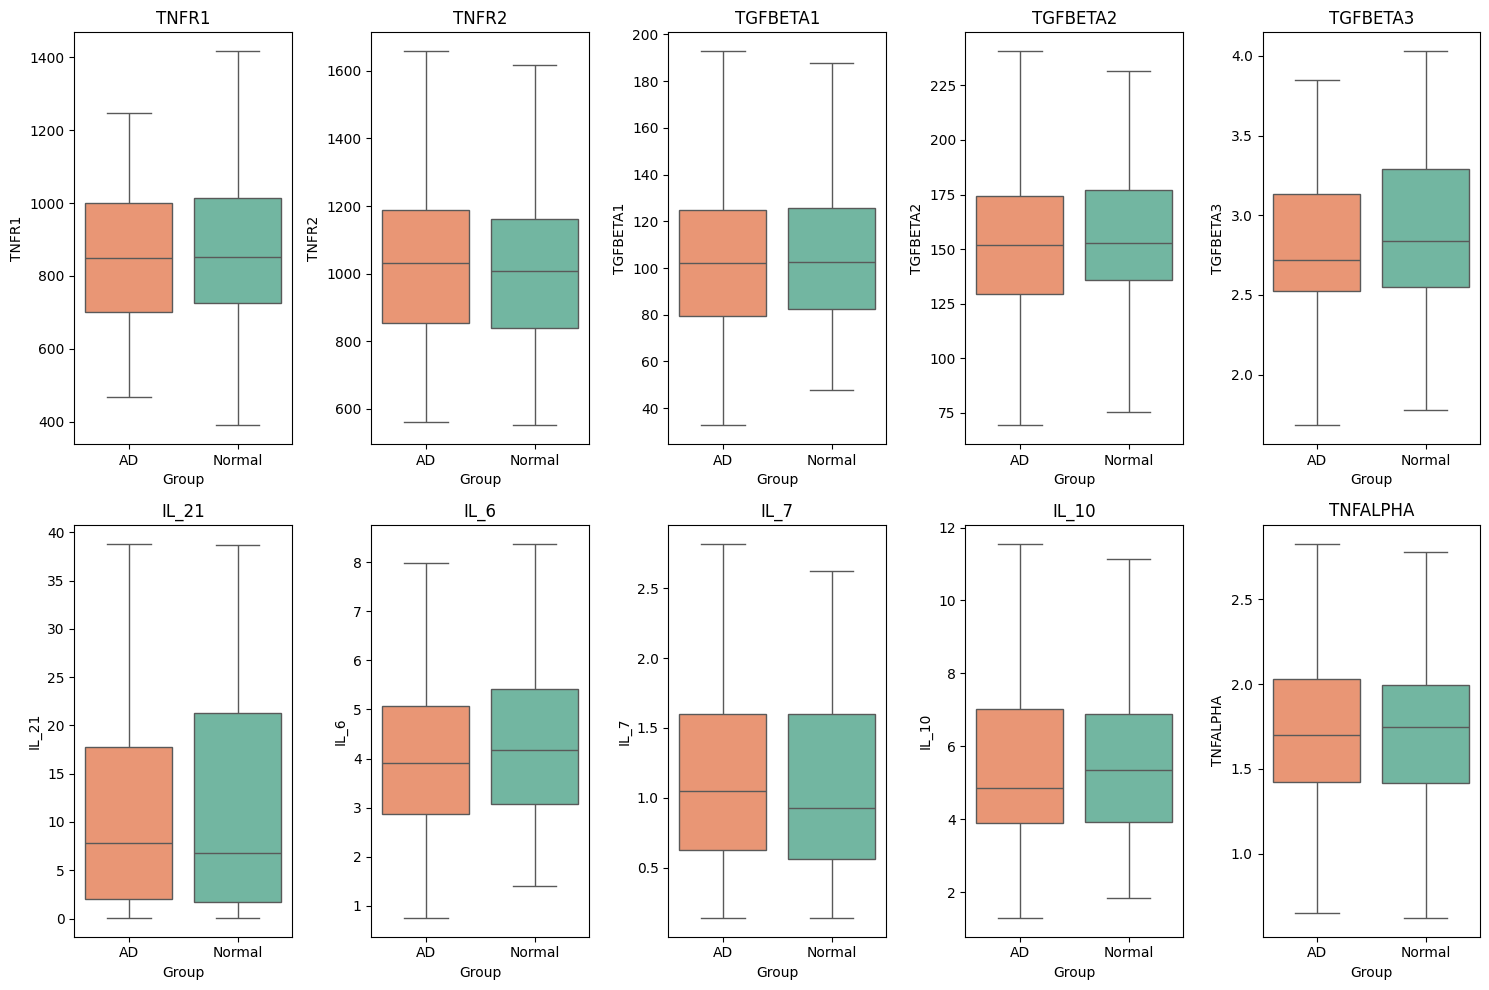

Filtered Biomarkers: (205, 23)
Rows with Null Biomarkers: (49, 23)


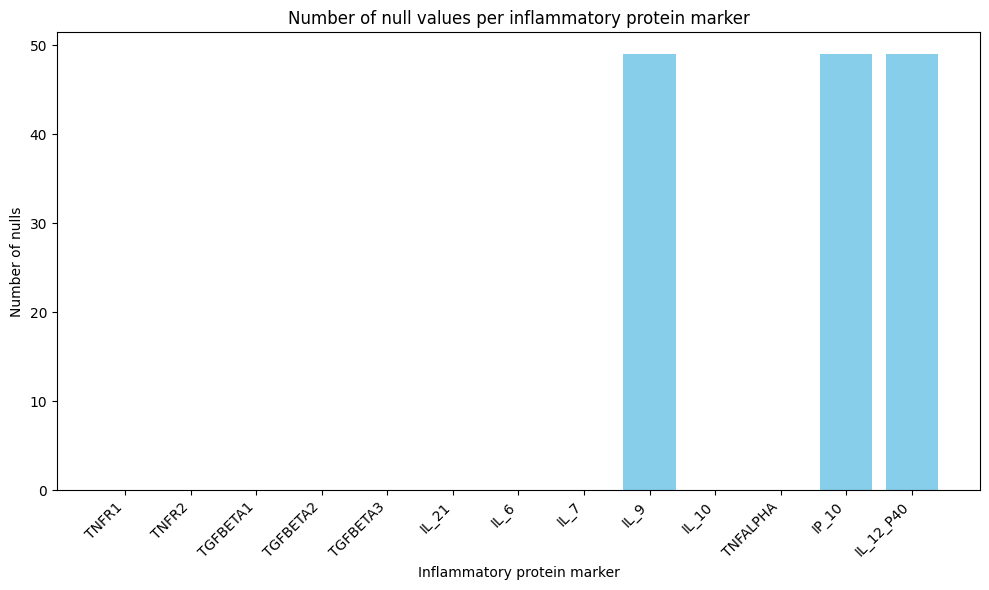

In [ ]:
combined_ptids = ad_ptids + normal_ptids
biomarker_data = pd.read_csv("/content/drive/MyDrive/HU_lab_inflammation_with_IDs.csv")
filtered_biomarkers = biomarker_data[biomarker_data['PTID'].isin(combined_ptids)]

filtered_biomarkers['Group'] = filtered_biomarkers['PTID'].apply(lambda x: 'AD' if x in ad_ptids else 'Normal')

biomarker_columns = ['TNFR1', 'TNFR2', 'TGFBETA1', 'TGFBETA2', 'TGFBETA3', 'IL_21', 'IL_6', 'IL_7', 'IL_10', 'TNFALPHA']

plt.figure(figsize=(15, 10))
for i, biomarker in enumerate(biomarker_columns):
    plt.subplot(2, 5, i + 1)
    colors = sns.color_palette("Set2")[0:2]
    reversed_colors = { "AD": colors[1], "Normal": colors[0] }

    sns.boxplot(x='Group', y=biomarker, data=filtered_biomarkers, showfliers=False, palette=reversed_colors)

    plt.title(biomarker)
    plt.tight_layout()

plt.show()

print("Filtered Biomarkers:", filtered_biomarkers.shape)

biomarker_columns = ['TNFR1', 'TNFR2', 'TGFBETA1', 'TGFBETA2', 'TGFBETA3', 'IL_21', 'IL_6', 'IL_7', 'IL_9', 'IL_10', 'TNFALPHA', 'IP_10', 'IL_12_P40']

rows_with_nulls = filtered_biomarkers[biomarker_columns].isna().any(axis=1)

null_biomarkers_data = filtered_biomarkers[rows_with_nulls]

print("Rows with Null Biomarkers:", null_biomarkers_data.shape)

null_counts = filtered_biomarkers[biomarker_columns].isna().sum()
plt.figure(figsize=(10, 6))
plt.bar(null_counts.index, null_counts.values, color='skyblue')
plt.xlabel('Inflammatory protein marker')
plt.ylabel('Number of nulls')
plt.title('Number of null values per inflammatory protein marker')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# plt.savefig('/content/drive/My Drive/plots/nan_values_biomarkers.png')

In [ ]:
duplicates = filtered_biomarkers.duplicated(subset='PTID', keep='first')

num_duplicate_ptids = duplicates.sum()

print("Number of rows with duplicate PTIDs:", num_duplicate_ptids)

def preprocess_biomarkers(df, biomarker_columns):
    df['EXAMDATE'] = pd.to_datetime(df['EXAMDATE'])

    df = df.sort_values(by=['PTID', 'EXAMDATE'], ascending=[True, False])

    def aggregate_biomarkers(group):
        if len(group) == 1:
            return group
        else:
            if group['EXAMDATE'].nunique() == 1:
                averaged_row = group[biomarker_columns].mean(skipna=True)
                for column in biomarker_columns:
                    group.iloc[0][column] = averaged_row[column]
                return group.iloc[[0]]
            else:
                return group.iloc[[0]]

    result_df = df.groupby('PTID').apply(aggregate_biomarkers).reset_index(drop=True)

    return result_df

biomarker_columns = ['TNFR1', 'TNFR2', 'TGFBETA1', 'TGFBETA2', 'TGFBETA3', 'IL_21', 'IL_6', 'IL_7', 'IL_9', 'IL_10', 'TNFALPHA', 'IP_10', 'IL_12_P40']
processed_biomarkers = preprocess_biomarkers(filtered_biomarkers, biomarker_columns)

desired_columns = ['PTID', 'TNFR1', 'TNFR2', 'TGFBETA1', 'TGFBETA2', 'TGFBETA3', 'IL_21', 'IL_6', 'IL_7', 'IL_10', 'TNFALPHA']
processed_biomarkers = processed_biomarkers[desired_columns]
processed_biomarkers.set_index('PTID', inplace=True)

print(processed_biomarkers.shape)
print(processed_biomarkers.head())

Number of rows with duplicate PTIDs: 12
(385, 10)
              TNFR1    TNFR2  TGFBETA1  TGFBETA2  TGFBETA3  IL_21  IL_6  IL_7  \
PTID                                                                            
002_S_0295  1020.05  1306.87    117.54    143.31      2.54  20.48  2.51  1.55   
002_S_0413   632.29   668.94    114.17    160.31     96.32   1.17  3.07  0.93   
002_S_0559   783.79  1103.78    130.07    197.20      2.84   0.27  5.12  0.93   
002_S_0619   557.83   726.93     54.74    179.00      2.90   0.47  4.81  0.15   
002_S_0685   998.19  1198.34     62.51     82.35      2.74   5.05  7.07  0.69   

            IL_10  TNFALPHA  
PTID                         
002_S_0295   3.75      1.75  
002_S_0413   5.65      1.56  
002_S_0559   5.23      2.04  
002_S_0619   2.69      1.28  
002_S_0685   4.18      1.15  


In [ ]:
biomarker_columns = ['TNFR1', 'TNFR2', 'TGFBETA1', 'TGFBETA2', 'TGFBETA3', 'IL_21', 'IL_6', 'IL_7', 'IL_10', 'TNFALPHA']

scaler = MinMaxScaler()

processed_biomarkers[biomarker_columns] = scaler.fit_transform(processed_biomarkers[biomarker_columns])

print(processed_biomarkers.head())

               TNFR1     TNFR2  TGFBETA1  TGFBETA2  TGFBETA3     IL_21  \
PTID                                                                     
002_S_0295  0.435915  0.151495  0.340587  0.352633  0.020296  0.224939   
002_S_0413  0.171135  0.027853  0.330822  0.394464  0.769636  0.012227   
002_S_0559  0.274586  0.112133  0.376894  0.485236  0.022693  0.002313   
002_S_0619  0.120290  0.039093  0.158616  0.440453  0.023172  0.004516   
002_S_0685  0.420988  0.130460  0.181131  0.202633  0.021894  0.054968   

                IL_6      IL_7     IL_10  TNFALPHA  
PTID                                                
002_S_0295  0.038253  0.057039  0.006770  0.064951  
002_S_0413  0.050424  0.031958  0.011998  0.056938  
002_S_0559  0.094979  0.031958  0.010842  0.077183  
002_S_0619  0.088242  0.000405  0.003853  0.045129  
002_S_0685  0.137361  0.022249  0.007953  0.039646  


In [ ]:
ad_biomarkers = processed_biomarkers[processed_biomarkers.index.isin(ad_ptids)]

normal_biomarkers = processed_biomarkers[processed_biomarkers.index.isin(normal_ptids)]

print("AD Biomarkers Shape:", ad_biomarkers.shape)
print("Normal Biomarkers Shape:", normal_biomarkers.shape)

AD Biomarkers Shape: (90, 10)
Normal Biomarkers Shape: (268, 10)


# Load data

In [ ]:
def load_data_with_mmap(data_path, ids_path):
    patient_ids = np.load(ids_path, allow_pickle=True)
    loaded_data = np.load(data_path, mmap_mode='r')
    data_dict = {}

    for i, pid in enumerate(patient_ids):
        array_name = f'arr_{i}'
        if array_name in loaded_data:
            data_dict[pid] = loaded_data[array_name]
        else:
            print(f"Array {array_name} not found in the .npz file.")
    return data_dict

def load_data(base_path, filename):
    file_path = os.path.join(base_path, filename)
    return joblib.load(file_path)

def sample_normal(normal_image_dict, normal_markers_dict, target_size):
    norm_ptids = list(normal_image_dict.keys())

    if len(norm_ptids) > target_size:
        sampled_ptids = random.sample(norm_ptids, target_size)
    else:
        sampled_ptids = norm_ptids

    sampled_normal_dict = {ptid: normal_image_dict[ptid] for ptid in sampled_ptids}
    sampled_normal_markers_dict = {ptid: normal_markers_dict[ptid] for ptid in sampled_ptids}

    return sampled_normal_dict, sampled_normal_markers_dict

def filter_and_convert_markers(markers_dict):
    selected_markers = ['TNFR1', 'TNFR2', 'IL_6', 'IL_10', 'TNFALPHA']
    filtered_markers_dict = {}
    for pid, markers in markers_dict.items():
        filtered_markers = [markers.get(marker) for marker in selected_markers if marker in markers]
        filtered_markers_dict[pid] = np.array(filtered_markers, dtype=np.float32)
    return filtered_markers_dict

base_path = '/content/drive/My Drive/processed_data'
ad_image_path = os.path.join(base_path, 'ad_data.npz')
ad_ids_path = os.path.join(base_path, 'ad_data_ids.npy')
normal_image_path = os.path.join(base_path, 'normal_data.npz')
normal_ids_path = os.path.join(base_path, 'normal_data_ids.npy')

ad_image_dict = load_data_with_mmap(ad_image_path, ad_ids_path)
normal_image_dict = load_data_with_mmap(normal_image_path, normal_ids_path)

ad_markers_dict = load_data(base_path, 'ad_markers_dict.pkl')
normal_markers_dict = load_data(base_path, 'normal_markers_dict.pkl')

ad_markers_dict = filter_and_convert_markers(ad_markers_dict)
normal_markers_dict = filter_and_convert_markers(normal_markers_dict)

normal_image_dict, normal_markers_dict = sample_normal(normal_image_dict, normal_markers_dict, len(ad_image_dict))

print("Number of AD data entries:", len(ad_image_dict))
print("Number of Normal data entries:", len(normal_image_dict))
print("Sampled Normal data entries:", len(normal_image_dict))
print("AD marker data (example):", ad_markers_dict[next(iter(ad_markers_dict.keys()))])
print("Normal marker data (example):", normal_markers_dict[next(iter(normal_markers_dict.keys()))])
print("Sampled Normal marker data entries:", len(normal_markers_dict))

print("Type of AD image data (example):", type(next(iter(ad_image_dict.values()))))
print("Type of Normal image data (example):", type(next(iter(normal_image_dict.values()))))
print("Type of AD marker data (example):", type(next(iter(ad_markers_dict.values()))))
print("Type of Normal marker data (example):", type(next(iter(normal_markers_dict.values()))))
print("Sampled Normal marker data entries:", len(normal_markers_dict))

Number of AD data entries: 90
Number of Normal data entries: 90
Sampled Normal data entries: 90
AD marker data (example): [1.         0.24035145 0.0609319  0.17710005 0.19010417]
Normal marker data (example): [0.         0.         0.0562724  0.08614232 0.05381944]
Sampled Normal marker data entries: 90
Type of AD image data (example): <class 'numpy.ndarray'>
Type of Normal image data (example): <class 'numpy.ndarray'>
Type of AD marker data (example): <class 'numpy.ndarray'>
Type of Normal marker data (example): <class 'numpy.ndarray'>
Sampled Normal marker data entries: 90


# Image Characterisation

In [ ]:
from skimage.filters import threshold_otsu

def apply_threshold(volume):
    threshold = threshold_otsu(volume)

    thresholded_volume = np.copy(volume)
    thresholded_volume[volume < threshold] = 0
    return thresholded_volume


def threshold_all_volumes(scans):
    """
    Apply thresholding to all volumes in the given array of scans.
    :param scans: Array of 3D scan volumes.
    :return: Array of thresholded 3D scan volumes.
    """
    thresholded_scans = []
    for volume in scans:
        thresholded_volume = apply_threshold(volume)
        thresholded_scans.append(thresholded_volume)
    return np.array(thresholded_scans)

ad_scans = threshold_all_volumes(ad_scans)
normal_scans = threshold_all_volumes(normal_scans)

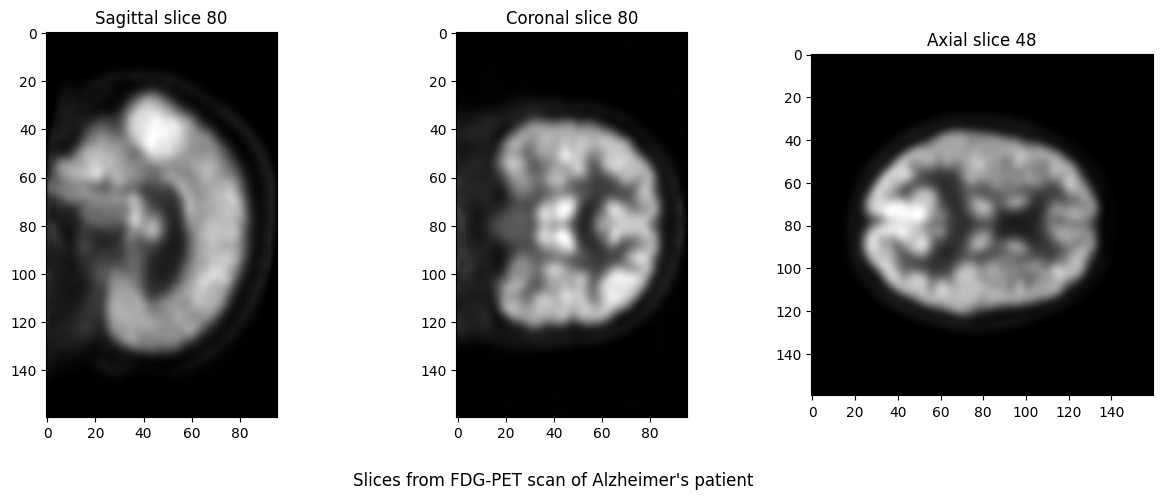

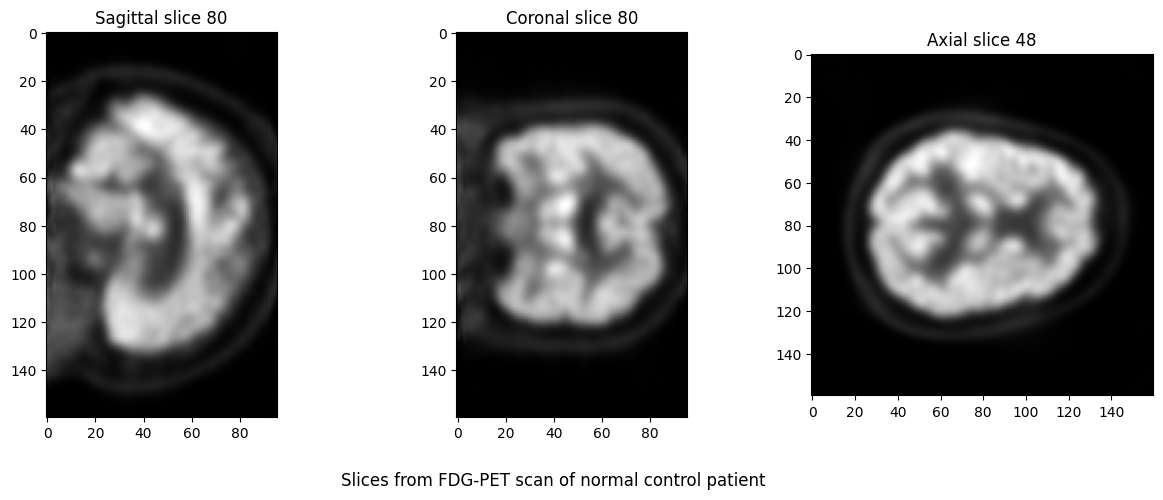

In [ ]:
def plot_slices(volume, title=''):
    """
    Plot the central slices from each dimension: axial, sagittal, coronal.
    :param volume: 3D numpy array
    :param title: Title for the overall plot
    """
    slice_nums = (volume.shape[0] // 2, volume.shape[1] // 2, volume.shape[2] // 2)

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Plotting the sagittal slice
    axes[0].imshow(volume[slice_nums[0], :, :], cmap="gray")
    axes[0].set_title(f'Sagittal slice {slice_nums[0]}')

    # Plotting the coronal slice
    axes[1].imshow(volume[:, slice_nums[1], :], cmap="gray")
    axes[1].set_title(f'Coronal slice {slice_nums[1]}')

    # Plotting the axial slice
    axes[2].imshow(volume[:, :, slice_nums[2]], cmap="gray")
    axes[2].set_title(f'Axial slice {slice_nums[2]}')

    # Setting the overall title
    fig.suptitle(title, y=0.0)

    plt.show()

plot_slices(ad_scans[39], title="Slices from FDG-PET scan of Alzheimer's patient")
plot_slices(normal_scans[23], title="Slices from FDG-PET scan of normal control patient")

#47, 11 mri

In [ ]:
def rotate_volume(volume):
    angles = [-20, -10, -5, 5, 10, 20]
    angle = random.choice(angles)
    rotated_volume = ndimage.rotate(volume, angle, reshape=False, mode='nearest', order=1)
    return rotated_volume

def flip_volume(volume):
    flipped_volume = np.flip(volume, axis=1)
    flipped_volume = np.flip(flipped_volume, axis=2)
    return flipped_volume

def add_gaussian_noise(volume):
    mean = 0
    sigma = 0.05
    noise = np.random.normal(mean, sigma, volume.shape)
    noisy_volume = volume + noise
    return noisy_volume

In [ ]:
augmented_ad_scans = []

for scan in ad_scans:
    augmented_ad_scans.append(scan)

    # rotated = rotate_volume(scan)
    # augmented_ad_scans.append(rotated)

    flipped = flip_volume(scan)
    augmented_ad_scans.append(flipped)

    flipped_noisy = add_gaussian_noise(flipped)
    augmented_ad_scans.append(flipped_noisy)

print('Augmented AD num:', len(augmented_ad_scans))

augmented_ad_labels = np.array([1 for _ in range(len(augmented_ad_scans))])

augmented_ad_scans = np.array(augmented_ad_scans)

permutation = np.random.permutation(len(augmented_ad_scans))
shuffled_scans = augmented_ad_scans[permutation]
shuffled_labels = augmented_ad_labels[permutation]

augmented_ad_scans = shuffled_scans
augmented_ad_labels = shuffled_labels

np.save(os.path.join('/content/drive/My Drive/processed_data', 'augmented_ad.npy'), augmented_ad_scans)
np.save(os.path.join('/content/drive/My Drive/processed_data', 'augmented_ad_labels.npy'), augmented_ad_labels)


In [ ]:
def load_arrays_with_mmap(base_path):
    # Paths to the saved files
    ad_scans_path = os.path.join(base_path, 'augmented_ad.npy')
    normal_scans_path = os.path.join(base_path, 'normal_scans.npy')
    ad_labels_path = os.path.join(base_path, 'augmented_ad_labels.npy')
    normal_labels_path = os.path.join(base_path, 'normal_labels.npy')

    normal_scans = np.load(normal_scans_path, mmap_mode='r')
    normal_labels = np.load(normal_labels_path, mmap_mode='r')

    augmented_ad_scans = np.load(ad_scans_path, mmap_mode='r')
    augmented_ad_labels = np.load(ad_labels_path, mmap_mode='r')

    return augmented_ad_scans, normal_scans, augmented_ad_labels, normal_labels

# Load the data
base_path = '/content/drive/My Drive/processed_data'
augmented_ad_scans, normal_scans, augmented_ad_labels, normal_labels = load_arrays_with_mmap(base_path)

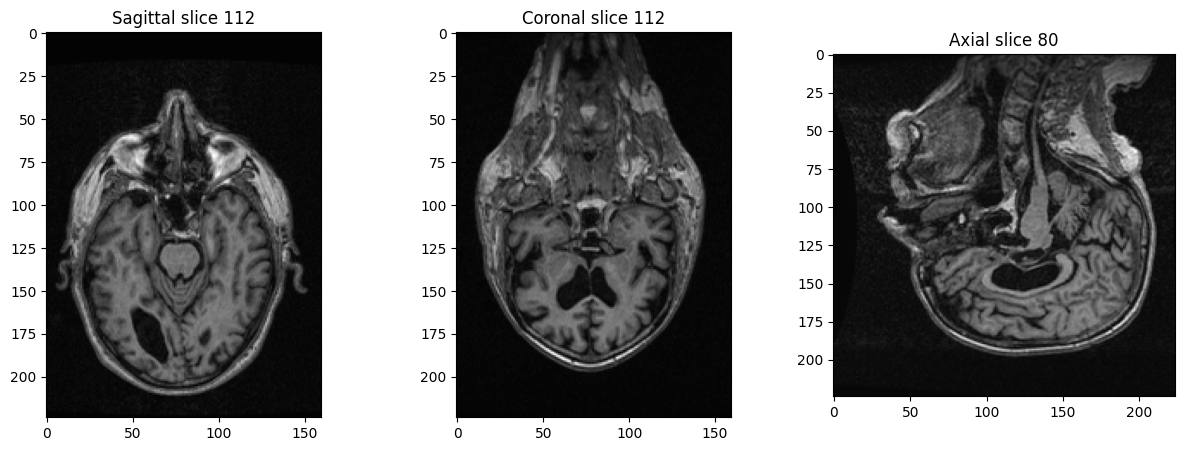

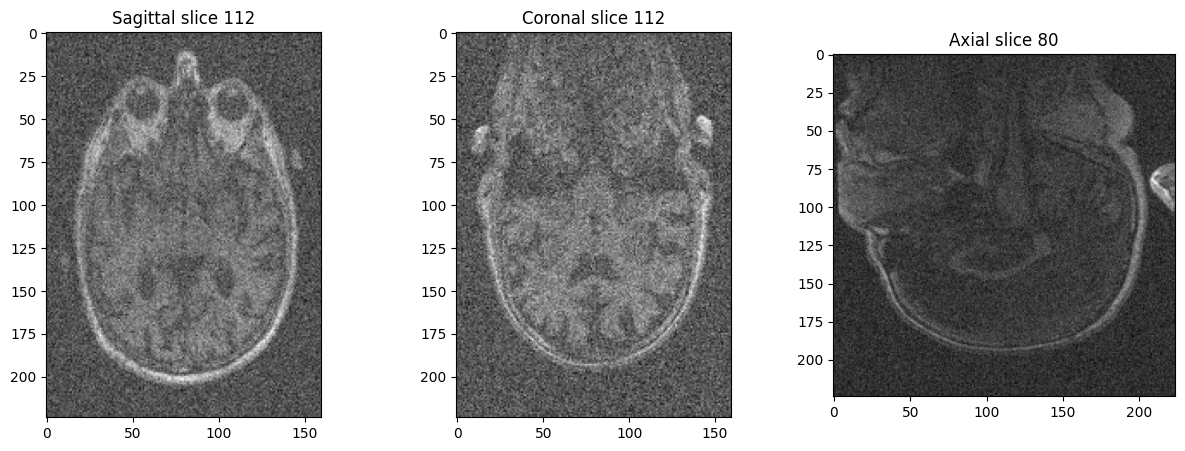

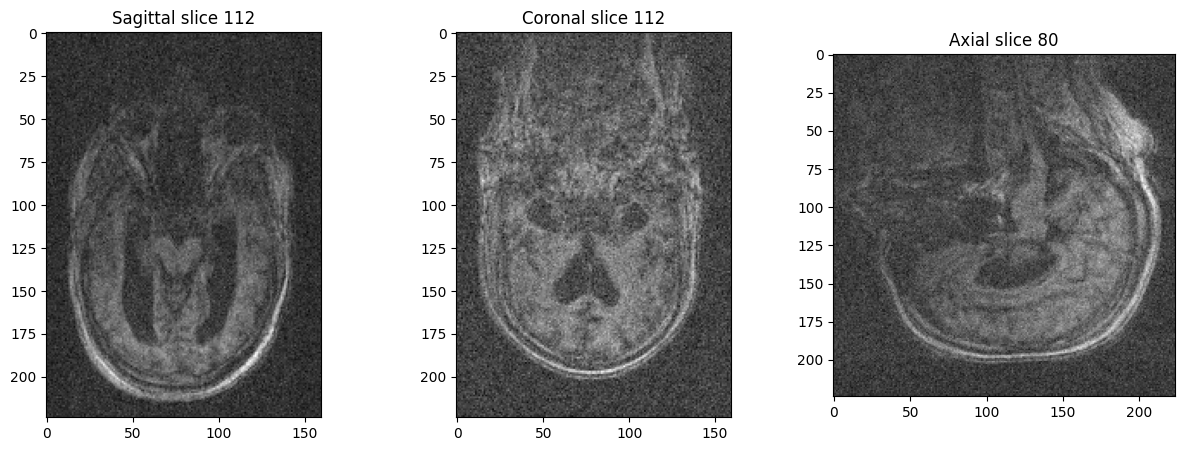

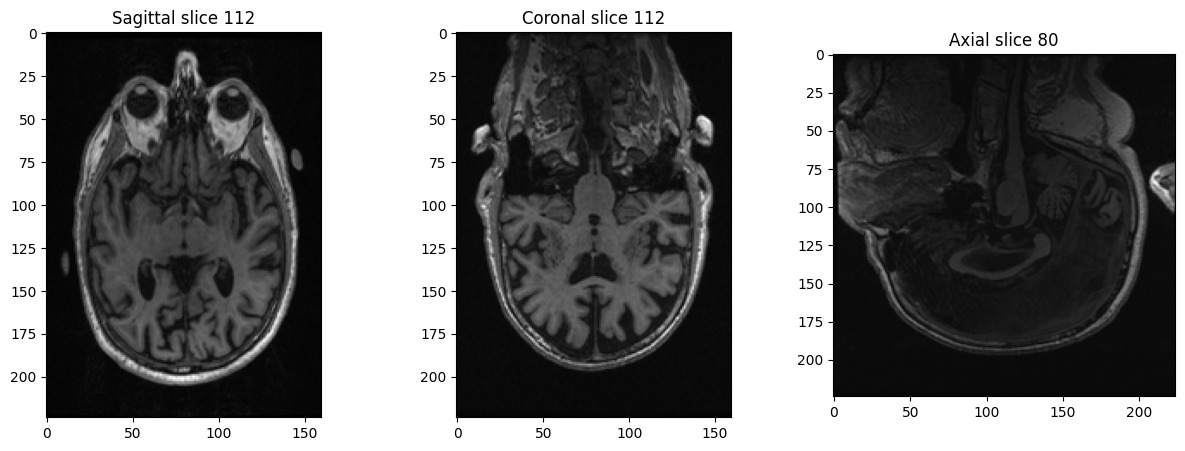

In [ ]:
plot_slices(augmented_ad_scans[0])
plot_slices(augmented_ad_scans[1])
plot_slices(augmented_ad_scans[2])
plot_slices(augmented_ad_scans[3])

# Splitting Dataset

Before executing the split method, make sure to change the shape dimensions depending on if using MRI of FDG-PET dataset.


MRI: [288,288,196]

FDG-PET: [160, 160, 96]

Both also need an extra dimension to represent the channel, which is = 1 since the image is greyscale

In [ ]:
def augment_3d_volume(volume_np, label):
    volume_np = np.squeeze(volume_np)
    volume_sitk = sitk.GetImageFromArray(volume_np)

    scale_factor = np.random.uniform(0.95, 1.05)
    translation = np.random.uniform(-14.4, 14.4, size=3)

    transform = sitk.AffineTransform(3)
    transform.Scale([scale_factor] * 3)
    transform.Translate(translation)

    resampler = sitk.ResampleImageFilter()
    resampler.SetReferenceImage(volume_sitk)
    resampler.SetInterpolator(sitk.sitkLinear)
    resampler.SetDefaultPixelValue(0)
    resampler.SetTransform(transform)

    augmented_volume_sitk = resampler.Execute(volume_sitk)

    augmented_volume_np = sitk.GetArrayFromImage(augmented_volume_sitk)

    augmented_volume_np = augmented_volume_np.reshape(288, 288, 196, 1)

    return augmented_volume_np, label

def tf_augment_3d_volume(volume, label):
    augmented_volume, label = tf.numpy_function(
        augment_3d_volume,
        [volume, label],
        [tf.float32, tf.int64]
    )

    augmented_volume.set_shape((288, 288, 196, 1))

    return augmented_volume, label

with tf.device('/cpu:0'):
    def split_image_dataset(ad_image_dict, norm_image_dict):
        print('Combining and splitting image dataset...')

        ad_labels = np.array([1 for _ in range(len(ad_image_dict))])
        norm_labels = np.array([0 for _ in range(len(norm_image_dict))])

        ad_ptids = list(ad_image_dict.keys())
        norm_ptids = list(norm_image_dict.keys())

        ad_image_data = np.array([ad_image_dict[ptid][..., np.newaxis] for ptid in ad_ptids])
        norm_image_data = np.array([norm_image_dict[ptid][..., np.newaxis] for ptid in norm_ptids])

        print('AD image shape after adding channel:', ad_image_data[0].shape)
        print('Normal image shape after adding channel:', norm_image_data[0].shape)

        ad_dataset_size = len(ad_image_data)
        ad_dataset_size_70 = round(0.7 * ad_dataset_size)
        ad_dataset_size_15 = round(0.15 * ad_dataset_size)

        ad_full_ds = tf.data.Dataset.from_tensor_slices((ad_image_data, ad_labels))
        ad_full_ds = ad_full_ds.shuffle(len(ad_image_data), seed=0, reshuffle_each_iteration=True)

        ad_test_loader = ad_full_ds.take(ad_dataset_size_15)
        ad_rest = ad_full_ds.skip(ad_dataset_size_15)
        ad_train_loader = ad_rest.take(ad_dataset_size_70)
        ad_val_loader = ad_rest.skip(ad_dataset_size_70)

        norm_dataset_size = len(norm_image_data)
        norm_dataset_size_70 = round(0.7 * norm_dataset_size)
        norm_dataset_size_15 = round(0.15 * norm_dataset_size)

        norm_full_ds = tf.data.Dataset.from_tensor_slices((norm_image_data, norm_labels))
        norm_full_ds = norm_full_ds.shuffle(len(norm_image_data), seed=0, reshuffle_each_iteration=True)

        norm_test_loader = norm_full_ds.take(norm_dataset_size_15)
        norm_rest = norm_full_ds.skip(norm_dataset_size_15)
        norm_train_loader = norm_rest.take(norm_dataset_size_70)
        norm_val_loader = norm_rest.skip(norm_dataset_size_70)

        train_loader = ad_train_loader.concatenate(norm_train_loader)
        val_loader = ad_val_loader.concatenate(norm_val_loader)
        test_loader = ad_test_loader.concatenate(norm_test_loader)

        print(f'Train samples count before batching: {train_loader.cardinality().numpy()}')
        print(f'Test samples count before batching: {test_loader.cardinality().numpy()}')
        print(f'Validation samples count before batching: {val_loader.cardinality().numpy()}')

        batch_size = 6

        train_ds = (
            train_loader
            .shuffle(buffer_size=ad_dataset_size_70 + norm_dataset_size_70, reshuffle_each_iteration=True)
            # .map(tf_augment_3d_volume, num_parallel_calls=tf.data.experimental.AUTOTUNE)
            .batch(batch_size)
            .prefetch(tf.data.experimental.AUTOTUNE)
        )

        val_ds = (
            val_loader
            .batch(batch_size)
            .prefetch(tf.data.experimental.AUTOTUNE)
        )

        test_ds = (
            test_loader
            .batch(batch_size)
            .prefetch(tf.data.experimental.AUTOTUNE)
        )

        return train_ds, val_ds, test_ds

    train_ds, val_ds, test_ds = split_image_dataset(ad_image_dict, normal_image_dict)

    print(f'Training set size: {len(train_ds)} batches')
    print(f'Validation set size: {len(val_ds)} batches')
    print(f'Test set size: {len(test_ds)} batches')

Combining and splitting image dataset...
AD image shape after adding channel: (288, 288, 196, 1)
Normal image shape after adding channel: (288, 288, 196, 1)
Train samples count before batching: 126
Test samples count before batching: 28
Validation samples count before batching: 26
Training set size: 21 batches
Validation set size: 5 batches
Test set size: 5 batches


In [ ]:
with tf.device('/cpu:0'):
    def split_nifti_biomarker_dataset(ad_image_dict, norm_image_dict, ad_bio_dict, norm_bio_dict):
        print('Combining and splitting dataset...')

        ad_labels = np.array([1 for _ in range(len(ad_image_dict))])
        norm_labels = np.array([0 for _ in range(len(norm_image_dict))])

        ad_ptids = list(ad_image_dict.keys())
        norm_ptids = list(norm_image_dict.keys())

        ad_image_data = np.array([ad_image_dict[ptid][..., np.newaxis] for ptid in ad_ptids])
        norm_image_data = np.array([norm_image_dict[ptid][..., np.newaxis] for ptid in norm_ptids])

        print('AD image shape after adding channel:', ad_image_data[0].shape)
        print('Normal image shape after adding channel:', norm_image_data[0].shape)

        ad_bio_data = np.array([ad_bio_dict[ptid] for ptid in ad_ptids])
        norm_bio_data = np.array([norm_bio_dict[ptid] for ptid in norm_ptids])

        ad_dataset_size = len(ad_image_data)
        ad_dataset_size_70 = round(0.7 * ad_dataset_size)
        ad_dataset_size_15 = round(0.15 * ad_dataset_size)

        ad_full_ds = tf.data.Dataset.from_tensor_slices(((ad_image_data, ad_bio_data), ad_labels))
        ad_full_ds = ad_full_ds.shuffle(len(ad_image_data), seed=0, reshuffle_each_iteration=False)

        ad_test_loader = ad_full_ds.take(ad_dataset_size_15)
        ad_rest = ad_full_ds.skip(ad_dataset_size_15)
        ad_train_loader = ad_rest.take(ad_dataset_size_70)
        ad_val_loader = ad_rest.skip(ad_dataset_size_70)

        norm_dataset_size = len(norm_image_data)
        norm_dataset_size_70 = round(0.7 * norm_dataset_size)
        norm_dataset_size_15 = round(0.15 * norm_dataset_size)

        norm_full_ds = tf.data.Dataset.from_tensor_slices(((norm_image_data, norm_bio_data), norm_labels))
        norm_full_ds = norm_full_ds.shuffle(len(norm_image_data), seed=0, reshuffle_each_iteration=False)

        norm_test_loader = norm_full_ds.take(norm_dataset_size_15)
        norm_rest = norm_full_ds.skip(norm_dataset_size_15)
        norm_train_loader = norm_rest.take(norm_dataset_size_70)
        norm_val_loader = norm_rest.skip(norm_dataset_size_70)

        train_loader = ad_train_loader.concatenate(norm_train_loader)
        val_loader = ad_val_loader.concatenate(norm_val_loader)
        test_loader = ad_test_loader.concatenate(norm_test_loader)

        print(f'Train samples count before batching: {train_loader.cardinality().numpy()}')
        print(f'Test samples count before batching: {test_loader.cardinality().numpy()}')
        print(f'Validation samples count before batching: {val_loader.cardinality().numpy()}')

        batch_size = 6

        train_ds = (
            train_loader
            .shuffle(buffer_size=ad_dataset_size_70 + norm_dataset_size_70, reshuffle_each_iteration=True)
            .batch(batch_size)
            .prefetch(tf.data.experimental.AUTOTUNE)
        )

        val_ds = (
            val_loader
            .batch(batch_size)
            .prefetch(tf.data.experimental.AUTOTUNE)
        )

        test_ds = (
            test_loader
            .batch(batch_size)
            .prefetch(tf.data.experimental.AUTOTUNE)
        )

        return train_ds, val_ds, test_ds

train_ds, val_ds, test_ds = split_nifti_biomarker_dataset(ad_image_dict, normal_image_dict, ad_markers_dict, normal_markers_dict)

print(f'Training set size: {len(train_ds)} batches')
print(f'Validation set size: {len(val_ds)} batches')
print(f'Test set size: {len(test_ds)} batches')

Combining and splitting dataset...
AD image shape after adding channel: (288, 288, 196, 1)
Normal image shape after adding channel: (288, 288, 196, 1)
Train samples count before batching: 126
Test samples count before batching: 28
Validation samples count before batching: 26
Training set size: 21 batches
Validation set size: 5 batches
Test set size: 5 batches


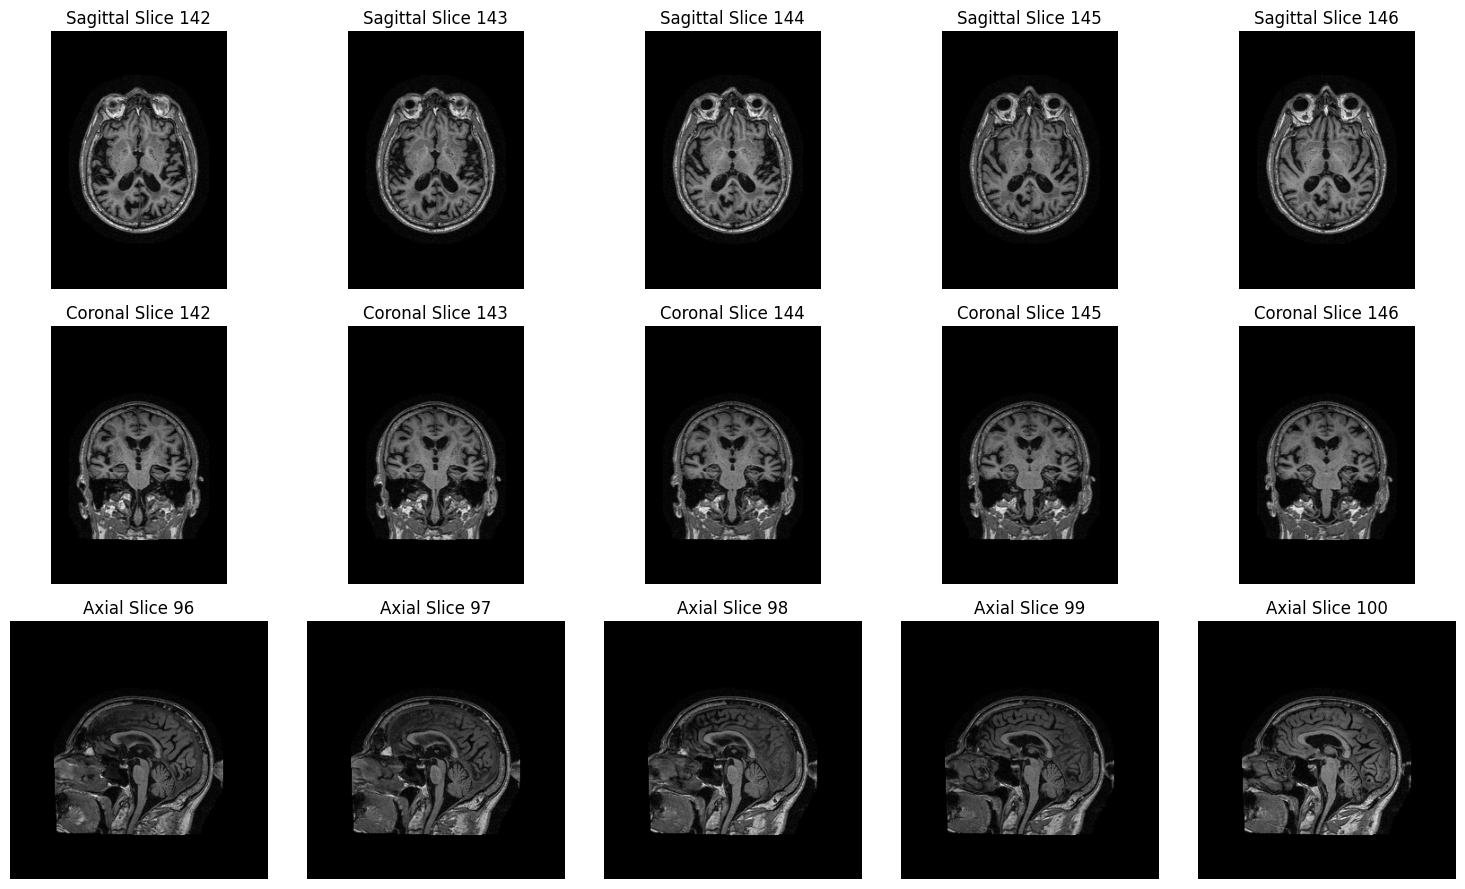

In [ ]:
def plot_middle_slices(volume):
    volume = np.squeeze(volume)

    sagittal_index = volume.shape[0] // 2
    coronal_index = volume.shape[1] // 2
    axial_index = volume.shape[2] // 2

    fig, axes = plt.subplots(3, 5, figsize=(15, 9))

    for i in range(5):
        idx = sagittal_index - 2 + i
        slice_img = volume[idx, :, :]
        axes[0, i].imshow(slice_img, cmap='gray')
        axes[0, i].set_title(f'Sagittal Slice {idx}')
        axes[0, i].axis('off')

    for i in range(5):
        idx = coronal_index - 2 + i
        slice_img = volume[:, idx, :]
        axes[1, i].imshow(slice_img, cmap='gray')
        axes[1, i].set_title(f'Coronal Slice {idx}')
        axes[1, i].axis('off')

    for i in range(5):
        idx = axial_index - 2 + i
        slice_img = volume[:, :, idx]
        axes[2, i].imshow(slice_img, cmap='gray')
        axes[2, i].set_title(f'Axial Slice {idx}')
        axes[2, i].axis('off')

    plt.tight_layout()
    plt.show()

for volume_batch, _ in train_ds.take(1):
    random_index = np.random.randint(0, volume_batch.shape[0])
    random_volume = volume_batch.numpy()[random_index]

    plot_middle_slices(random_volume)

# Augmentation attempts

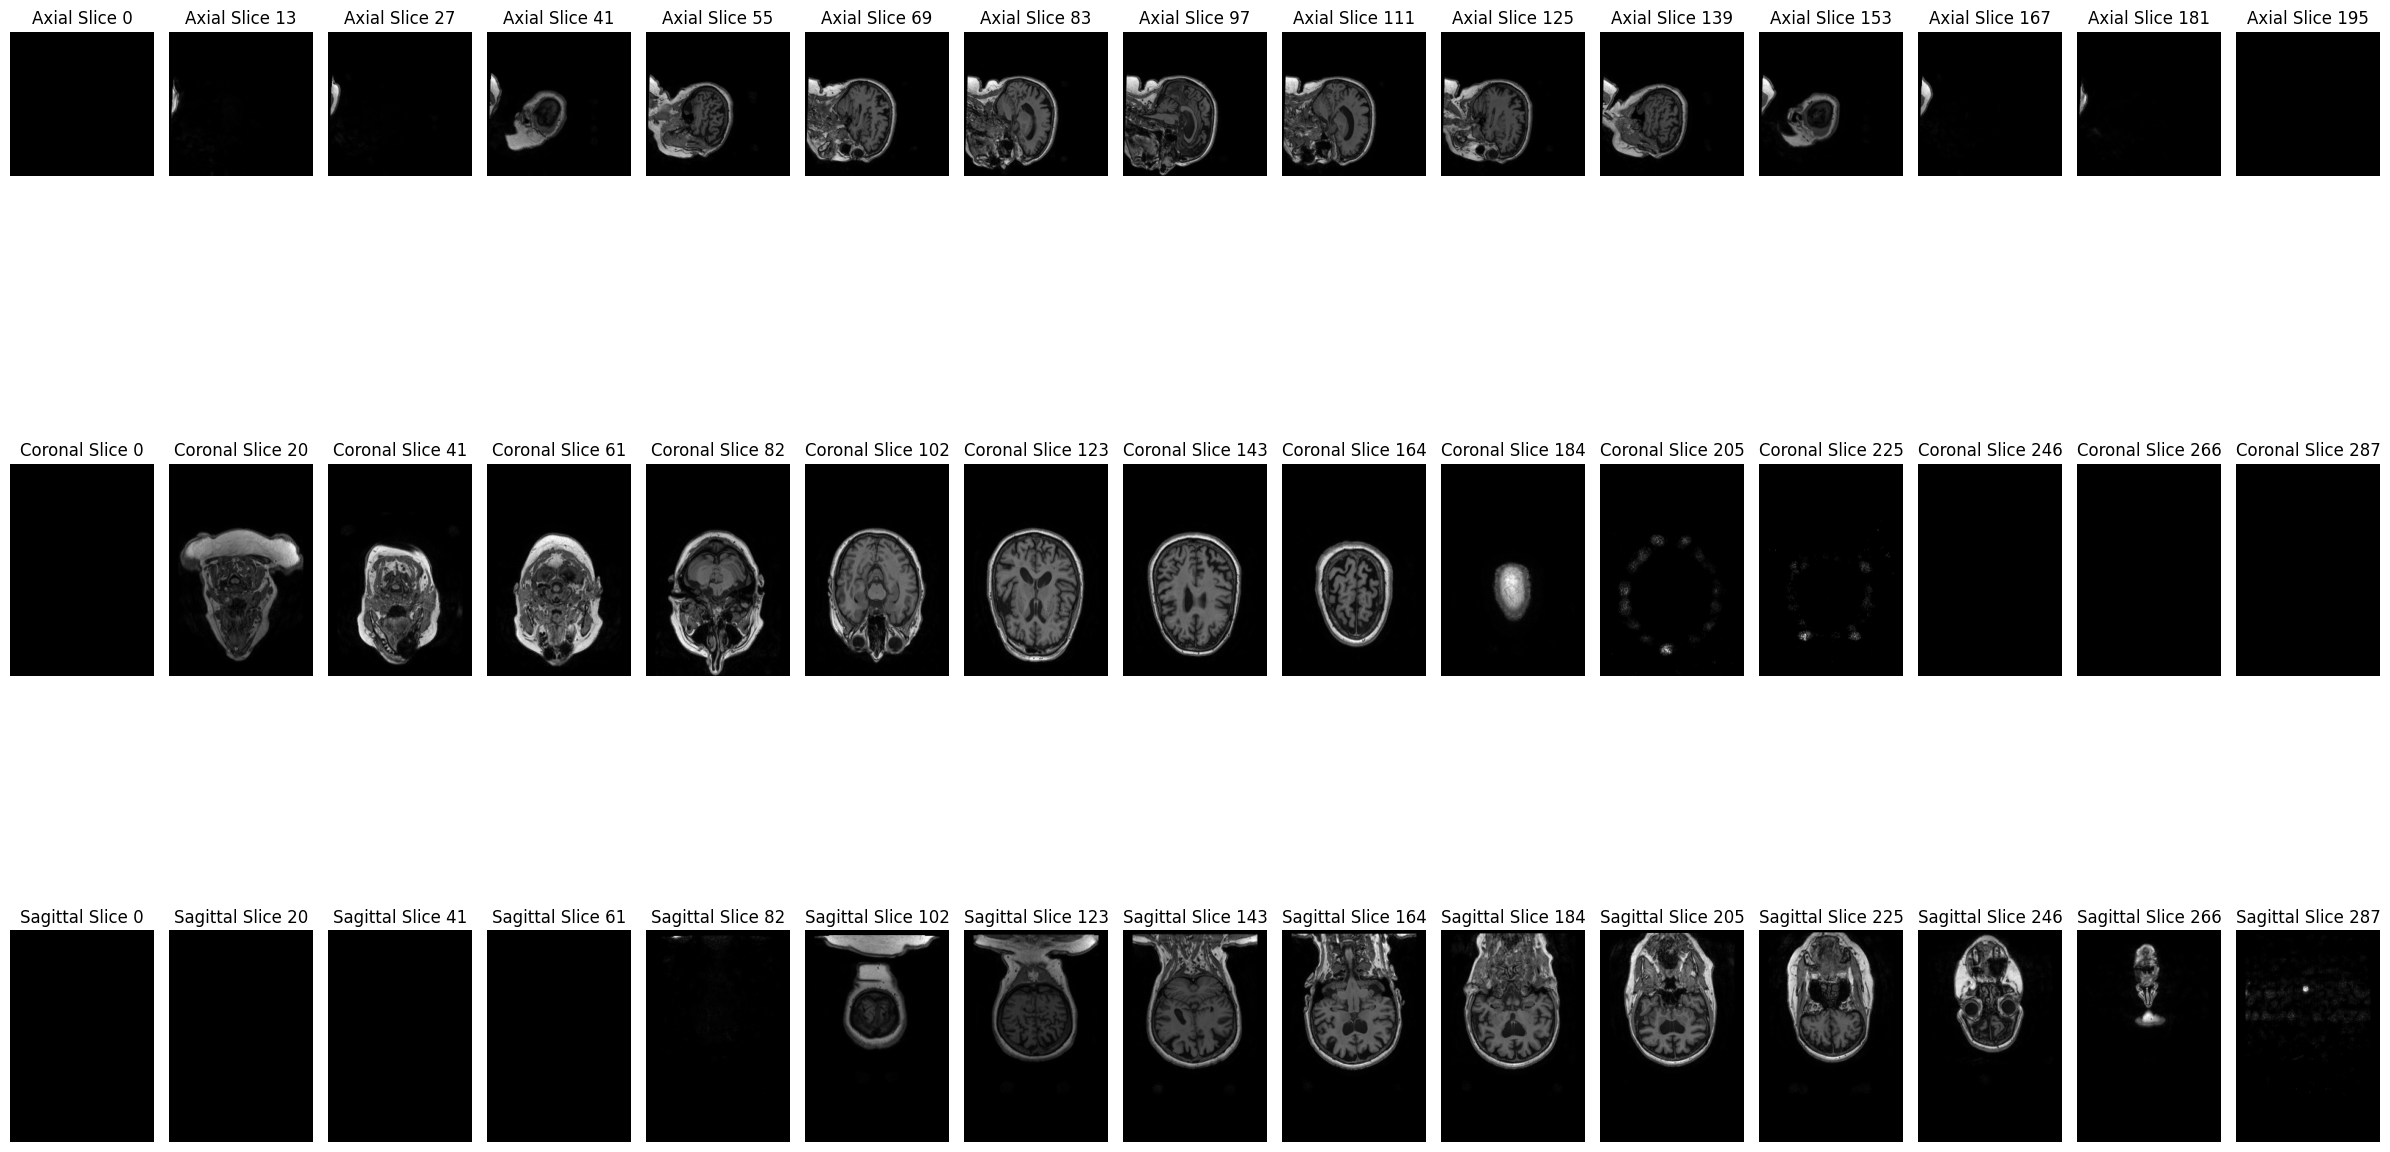

In [ ]:
def plot_slices(volume, slices_per_axis=15):
    axial_slices = np.linspace(0, volume.shape[2] - 1, slices_per_axis, dtype=int)
    coronal_slices = np.linspace(0, volume.shape[1] - 1, slices_per_axis, dtype=int)
    sagittal_slices = np.linspace(0, volume.shape[0] - 1, slices_per_axis, dtype=int)

    fig, axes = plt.subplots(3, slices_per_axis, figsize=(24, 16))

    for i, slice_idx in enumerate(axial_slices):
        axes[0, i].imshow(volume[:, :, slice_idx], cmap='gray')
        axes[0, i].set_title(f'Axial Slice {slice_idx}')
        axes[0, i].axis('off')

    for i, slice_idx in enumerate(coronal_slices):
        axes[1, i].imshow(volume[:, slice_idx, :], cmap='gray')
        axes[1, i].set_title(f'Coronal Slice {slice_idx}')
        axes[1, i].axis('off')

    for i, slice_idx in enumerate(sagittal_slices):
        axes[2, i].imshow(volume[slice_idx, :, :], cmap='gray')
        axes[2, i].set_title(f'Sagittal Slice {slice_idx}')
        axes[2, i].axis('off')

    plt.tight_layout()
    plt.show()

x_batch, y_batch = next(train_generator)
volume = x_batch[5]

plot_slices(volume, slices_per_axis=15)

In [ ]:
def affine_scale(image, scale_factor):
    if isinstance(scale_factor, (list, tuple)):
        scale_matrix = np.diag([1/s for s in scale_factor] + [1])
    else:
        scale_matrix = np.diag([1/scale_factor]*3 + [1])

    offset = [(0.5 * (s - 1) * dim) for s, dim in zip(scale_factor, image.shape)]
    scaled_image = ndimage.affine_transform(image, scale_matrix, offset=offset, order=1, mode='constant', cval=0.0)
    return scaled_image

def affine_translate(image, shift_vector):
    translated_image = ndimage.shift(image, shift=shift_vector, mode='nearest')
    return translated_image

def process_affine_augmentation(volume):
    scale_factors = np.random.uniform(0.9, 1.1, size=3)
    volume = affine_scale(volume, scale_factors)

    translations = np.random.uniform(-10, 10, size=3)
    volume = affine_translate(volume, translations)

    volume = pad_to_shape(volume, (288, 288, 196))
    return volume

def pad_to_shape(volume, target_shape):
    padding = [(max(0, (t - s) // 2), max(0, t - s - (t - s) // 2)) for s, t in zip(volume.shape, target_shape)]
    padded_volume = np.pad(volume, padding, mode='constant', constant_values=0)
    return padded_volume

def tf_process_affine_augmentation(volume):
    [volume,] = tf.numpy_function(process_affine_augmentation, [volume], [tf.float32])
    volume.set_shape((288, 288, 196, 1))
    return volume

def prepare_tf_dataset(volumes, labels, batch_size, augment=False):
    dataset = tf.data.Dataset.from_tensor_slices((volumes, labels))
    if augment:
        dataset = dataset.map(lambda x, y: (tf_process_affine_augmentation(x), y), num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.shuffle(1000).batch(batch_size).prefetch(tf.data.AUTOTUNE)
    return dataset

train_dataset = prepare_tf_dataset(x_train, y_train, batch_size=2, augment=True)
val_dataset = prepare_tf_dataset(x_val, y_val, batch_size=2)
test_dataset = prepare_tf_dataset(x_test, y_test, batch_size=2)

In [ ]:
def augment_volume(volume):
    angle = np.random.uniform(-10, 10)
    volume_rotated = ndimage.rotate(volume, angle, axes=(1, 2), reshape=False, mode='nearest')

    axis_to_flip = np.random.randint(0, 3)
    volume_flipped = np.flip(volume_rotated, axis=axis_to_flip)

    return volume_flipped

def flip_volume(volume):
    flipped_volume = np.flip(volume, axis=1)
    flipped_volume = np.flip(flipped_volume, axis=2)
    return flipped_volume

def add_gaussian_noise(volume):
    mean = 0
    sigma = 0.05
    noise = np.random.normal(mean, sigma, volume.shape)
    noisy_volume = volume + noise
    return noisy_volume

def generate_augmented_data(ad_data, n_augmentations=1):
    augmented_data = []
    for volume in ad_data:
        augmented_data.append(volume)

        flipped = flip_volume(volume)
        augmented_data.append(flipped)

        flipped_noisy = add_gaussian_noise(flipped)
        augmented_data.append(flipped_noisy)

    return np.array(augmented_data)

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
TRAIN_COUNT = len(ad_scans) + len(normal_scans)
zero_weight = (1 / len(normal_scans)) * TRAIN_COUNT / 2.0
one_weight = (1 / len(ad_scans)) * TRAIN_COUNT / 2.0

class_weights = {0: zero_weight, 1: one_weight}

print('Number of normal: {:.2f}'.format(len(normal_scans)))
print('Number of AD: {:.2f}'.format(len(ad_scans)))
print('Weight for normal: {:.2f}'.format(zero_weight))
print('Weight for AD: {:.2f}'.format(one_weight))
# print('Train shape:', x_train.shape)
# print('Val shape:', x_val.shape)
# print('Test shape:', x_test.shape)

# num_ad = np.sum(y_train == 1)
# num_not_ad = np.sum(y_train == 0)

# print(f'Number of AD images in training set: {num_ad}')
# print(f'Number of not AD images in training set: {num_not_ad}')

# classes = np.unique(y_train)
# class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
# class_weights_dict = dict(zip(classes, class_weights))

# print(f'Class weights: {class_weights_dict}')

NameError: name 'ad_scans' is not defined

# Model Implementation

# Dense Net test

In [ ]:
!pip install git+https://www.github.com/keras-team/keras-contrib.git

  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-dizkuia2
  Running command git clone --filter=blob:none --quiet https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-dizkuia2
  Resolved https://www.github.com/keras-team/keras-contrib.git to commit 3fc5ef709e061416f4bc8a92ca3750c824b5d2b0
  Preparing metadata (setup.py) ... done
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-py3-none-any.whl size=101055 sha256=fef3b040b565ef1b3c2ff8007b65ad8fa1e5b57748320f8e528d230eac14aa51
  Stored in directory: /tmp/pip-ephem-wheel-cache-i_ad1u8c/wheels/74/d5/f7/0245af7ac33d5b0c2e095688649916e4bf9a8d6b3362a849f5
Successfully built keras-contrib


In [ ]:
from tensorflow.keras.layers import GlobalAveragePooling3D, Dense
from tensorflow.keras.models import Model
from DenseNet3D import DenseNet3DImageNet121

base_model = DenseNet3DImageNet121(input_shape=(288, 288, 196, 1), include_top=False, pooling='avg', classes=1)

output = Dense(1, activation='sigmoid')(base_model.output)
model = Model(inputs=base_model.input, outputs=output)
model.summary()

checkpoint = keras.callbacks.ModelCheckpoint(
    "densenet3D_images.keras", save_best_only=True
)
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=15)
METRICS = [
    keras.metrics.AUC(name='AUC'),
    keras.metrics.BinaryAccuracy(name='binary_accuracy'),
    "acc"
]

model.compile(
        optimizer= keras.optimizers.Adam(),
        loss='binary_crossentropy',
        metrics=METRICS
    )

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 288, 288, 196, 1)]   0         []                            
                                                                                                  
 initial_Conv3D (Conv3D)     (None, 144, 144, 98, 64)     21952     ['input_1[0][0]']             
                                                                                                  
 initial_bn (BatchNormaliza  (None, 144, 144, 98, 64)     256       ['initial_Conv3D[0][0]']      
 tion)                                                                                            
                                                                                                  
 activation (Activation)     (None, 144, 144, 98, 64)     0         ['initial_bn[0][0]']      

In [ ]:
from resnet3d import Resnet3DBuilder

model = Resnet3DBuilder.build_resnet_152((224, 224, 160, 1), 1)
model.compile(loss="binary_crossentropy",
    optimizer='adam',
    metrics=["acc"])

checkpoint = keras.callbacks.ModelCheckpoint(
    "3d_classification.keras", save_best_only=True
)
early_stopping = keras.callbacks.EarlyStopping(monitor="val_acc", patience=15)

model.summary()

# Residual Unit with 3D layers

In [ ]:
@keras.saving.register_keras_serializable()
class ResidualUnit(keras.layers.Layer):
    def __init__(self, filters, strides=1, activation='relu', **kwargs):
        super().__init__(**kwargs)
        self.filters = filters
        self.strides = strides
        self.activation = keras.activations.get(activation)

        self.main_layers = [
            keras.layers.Conv3D(filters, 3, strides=strides, padding='same', use_bias=False, kernel_initializer='he_normal'),
            keras.layers.BatchNormalization(),
            self.activation,
            keras.layers.Conv3D(filters, 3, strides=1, padding='same', use_bias=False, kernel_initializer='he_normal'),
            keras.layers.BatchNormalization()]

        self.skip_layers = []
        if strides > 1:
            self.skip_layers = [
                keras.layers.Conv3D(filters, 1, strides=strides, padding='same', use_bias=False, kernel_initializer='he_normal'),
                keras.layers.BatchNormalization()
            ]

    def get_config(self):
        config = super().get_config().copy()
        config.update({
            'filters': self.filters,
            'strides': self.strides,
            'activation': keras.activations.serialize(self.activation)
        })
        return config

    def call(self, inputs):
        Z = inputs
        for layer in self.main_layers:
            Z = layer(Z)
        skip_Z = inputs
        for layer in self.skip_layers:
            skip_Z = layer(skip_Z)
        return self.activation(Z + skip_Z)

class StopAt100Callback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        train_acc = logs.get('binary_accuracy')
        val_acc = logs.get('val_binary_accuracy')
        if train_acc == 1.0 and val_acc == 1.0:
            print("\nBoth training and validation accuracy reached 100%. Stopping training...")
            self.model.stop_training = True


#  Neuroimaging ResNet-18 with 3D Layers

In [ ]:
METRICS = [
    keras.metrics.BinaryAccuracy(name='binary_accuracy')
]
INPUT_SHAPE = [288,288,196,1]
def build_resnet18_model(input_dimension):
    input_img = Input(shape=input_dimension)
    model = Conv3D(64, 7, strides=2, padding='same', use_bias=False, kernel_initializer='he_normal')(input_img)
    model = BatchNormalization()(model)
    model = Activation('relu')(model)
    model = MaxPooling3D(pool_size=3, strides=2, padding='same')(model)

    prev_filters = 64
    for filters in [64] * 2 + [128] * 2 + [256] * 2 + [512] * 2:
        strides = 1 if filters == prev_filters else 2
        model = ResidualUnit(filters, strides=strides)(model)
        prev_filters = filters

    model = GlobalAveragePooling3D()(model)
    output_layer = Dense(1, activation='sigmoid')(model)

    merged_model = Model(inputs=[input_img], outputs=[output_layer])
    merged_model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.0001),
        loss='binary_crossentropy',
        metrics=METRICS
    )

    return merged_model

model = build_resnet18_model(INPUT_SHAPE)
model.summary()

checkpoint = keras.callbacks.ModelCheckpoint(
    "/content/drive/MyDrive/models/checkpoint_final_mri_4.keras",
    save_best_only=True,
    monitor="val_loss"
)
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=15,
    restore_best_weights=True
)
stop_at_100 = StopAt100Callback()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 288, 288, 196,    0         
                             1)]                                 
                                                                 
 conv3d (Conv3D)             (None, 144, 144, 98, 64   21952     
                             )                                   
                                                                 
 batch_normalization (Batch  (None, 144, 144, 98, 64   256       
 Normalization)              )                                   
                                                                 
 activation (Activation)     (None, 144, 144, 98, 64   0         
                             )                                   
                                                                 
 max_pooling3d (MaxPooling3  (None, 72, 72, 49, 64)    0     

# Neuroimaging Resnet-34 with 3D layers

In [ ]:
METRICS = [
    keras.metrics.BinaryAccuracy(name='binary_accuracy')
]
INPUT_SHAPE = [288,288,196,1]

def build_resnet34_model(input_dimension):
    input_img = keras.layers.Input(shape=input_dimension)
    model = keras.layers.Conv3D(64, 7, strides=2, padding='same', use_bias=False, kernel_initializer='he_normal')(input_img)
    model = keras.layers.BatchNormalization()(model)
    model = keras.layers.Activation('relu')(model)
    model = keras.layers.MaxPooling3D(pool_size=3, strides=2, padding='same')(model)

    prev_filters = 64
    for filters in [64] * 3 + [128] * 4 + [256] * 6 + [512] * 3:
        strides = 1 if filters == prev_filters else 2
        model = ResidualUnit(filters, strides=strides)(model)
        prev_filters = filters

    model = keras.layers.GlobalAveragePooling3D()(model)
    output_layer = keras.layers.Dense(1, activation='sigmoid')(model)

    merged_model = keras.Model(inputs=[input_img], outputs=[output_layer])

    merged_model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.0001),
        loss='binary_crossentropy',
        metrics=METRICS
    )

    return merged_model

model = build_resnet34_model(INPUT_SHAPE)
model.summary()

checkpoint = keras.callbacks.ModelCheckpoint(
    "/content/drive/MyDrive/models/checkpoint_config8.keras",
    save_best_only=True,
    monitor="val_loss"
)
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=15,
    restore_best_weights=True
)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 288, 288, 196,    0         
                             1)]                                 
                                                                 
 conv3d (Conv3D)             (None, 144, 144, 98, 64   21952     
                             )                                   
                                                                 
 batch_normalization (Batch  (None, 144, 144, 98, 64   256       
 Normalization)              )                                   
                                                                 
 activation (Activation)     (None, 144, 144, 98, 64   0         
                             )                                   
                                                                 
 max_pooling3d (MaxPooling3  (None, 72, 72, 49, 64)    0     

# Combined Neuroimaging and Biomarker ResNet-18 with 3D layers

In [ ]:
METRICS = [
    keras.metrics.BinaryAccuracy(name='binary_accuracy')
]
INPUT_SHAPE=[288,288,196,1]

def build_resnet34_model(input_dimension) :
    input_img = keras.layers.Input(shape=input_dimension)
    model = keras.layers.Conv3D(64,7,strides=2, input_shape=input_dimension, padding='same', use_bias=False, kernel_initializer='he_normal')(input_img)
    model = keras.layers.BatchNormalization()(model)
    model = keras.layers.Activation('relu')(model)
    model = keras.layers.MaxPooling3D(pool_size=3, strides=2, padding='same')(model)

    prev_filters = 64
    for filters in [64] * 2 + [128] * 2 + [256] * 2 + [512] * 2:
        strides = 1 if filters == prev_filters else 2
        model = ResidualUnit(filters, strides=strides)(model)
        prev_filters = filters

    model = keras.layers.GlobalAvgPool3D()(model)
    model = keras.layers.Flatten()(model)

    bio_input = keras.layers.Input(shape=[5])
    bio_model = keras.layers.Dense(30, activation='relu')(bio_input)
    bio_model = keras.layers.Dense(30, activation='relu')(bio_model)

    combined_layer = keras.layers.Concatenate(axis=1)([model, bio_model])

    output_layer = keras.layers.Dense(1,activation='sigmoid')(combined_layer)

    merged_model = keras.Model(inputs=[input_img, bio_input], outputs=[output_layer])

    merged_model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.0001),
        loss='binary_crossentropy',
        metrics=METRICS
    )

    return merged_model

model = build_resnet34_model(INPUT_SHAPE)
model.summary()

checkpoint = keras.callbacks.ModelCheckpoint(
    "/content/drive/MyDrive/models/checkpoint_final_combined2.keras",
    save_best_only=True,
    monitor="val_loss"
)
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=15,
    restore_best_weights=True
)

stop_at_100 = StopAt100Callback()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 288, 288, 196, 1)]   0         []                            
                                                                                                  
 conv3d (Conv3D)             (None, 144, 144, 98, 64)     21952     ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 144, 144, 98, 64)     256       ['conv3d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 144, 144, 98, 64)     0         ['batch_normalization[0][0

# Combined Neuroimaging and Biomarker ResNet-34 with 3D layers

In [ ]:
METRICS = [
    keras.metrics.BinaryAccuracy(name='binary_accuracy')
]
INPUT_SHAPE=[288,288,196,1]

def build_resnet34_model(input_dimension) :
    input_img = keras.layers.Input(shape=input_dimension)
    model = keras.layers.Conv3D(64,7,strides=2, input_shape=input_dimension, padding='same', use_bias=False, kernel_initializer='he_normal')(input_img)
    model = keras.layers.BatchNormalization()(model)
    model = keras.layers.Activation('relu')(model)
    model = keras.layers.MaxPooling3D(pool_size=3, strides=2, padding='same')(model)

    prev_filters = 64
    for filters in [64] * 3 + [128] * 4 + [256] * 6 + [512] * 3:
        strides = 1 if filters == prev_filters else 2
        model = ResidualUnit(filters, strides=strides)(model)
        prev_filters = filters

    model = keras.layers.GlobalAvgPool3D()(model)
    model = keras.layers.Flatten()(model)

    bio_input = keras.layers.Input(shape=[5])
    bio_model = keras.layers.Dense(30, activation='relu')(bio_input)
    bio_model = keras.layers.Dense(30, activation='relu')(bio_model)

    combined_layer = keras.layers.Concatenate(axis=1)([model, bio_model])

    output_layer = keras.layers.Dense(1,activation='sigmoid')(combined_layer)

    merged_model = keras.Model(inputs=[input_img, bio_input], outputs=[output_layer])

    merged_model.compile(
        optimizer=keras.optimizers.SGD(learning_rate=0.0005),
        loss='binary_crossentropy',
        metrics=METRICS
    )

    return merged_model

model = build_resnet34_model(INPUT_SHAPE)
model.summary()

checkpoint = keras.callbacks.ModelCheckpoint(
    "/content/drive/MyDrive/models/checkpoint_config5.keras",
    save_best_only=True,
    monitor="val_loss"
)
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=15,
    restore_best_weights=True
)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 288, 288, 196, 1)]   0         []                            
                                                                                                  
 conv3d_39 (Conv3D)          (None, 144, 144, 98, 64)     21952     ['input_3[0][0]']             
                                                                                                  
 batch_normalization_39 (Ba  (None, 144, 144, 98, 64)     256       ['conv3d_39[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_1 (Activation)   (None, 144, 144, 98, 64)     0         ['batch_normalization_39

# Training Model


In [ ]:
epochs=50

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    verbose=1,
    callbacks=[checkpoint, early_stopping, stop_at_100]
)

model.save("/content/drive/MyDrive/models/final_combined_3.keras")

# try:
#     model.fit(
#         train_ds.take(1),
#         validation_data=val_ds.take(1),
#         epochs=1,
#         verbose=1
#     )
# except Exception as e:
#     print("Encountered an error during fit: ", e)

Epoch 1/50
21/21 [==============================] - 37s 878ms/step - loss: 0.7658 - binary_accuracy: 0.6508 - val_loss: 1.7372 - val_binary_accuracy: 0.5000
Epoch 2/50
21/21 [==============================] - 12s 554ms/step - loss: 0.5858 - binary_accuracy: 0.7143 - val_loss: 0.9041 - val_binary_accuracy: 0.5000
Epoch 3/50
21/21 [==============================] - 11s 538ms/step - loss: 0.4368 - binary_accuracy: 0.7857 - val_loss: 0.7465 - val_binary_accuracy: 0.5385
Epoch 4/50
21/21 [==============================] - 11s 538ms/step - loss: 0.2833 - binary_accuracy: 0.9048 - val_loss: 0.7158 - val_binary_accuracy: 0.5769
Epoch 5/50
21/21 [==============================] - 9s 446ms/step - loss: 0.2606 - binary_accuracy: 0.8968 - val_loss: 6.4009 - val_binary_accuracy: 0.5000
Epoch 6/50
21/21 [==============================] - 9s 448ms/step - loss: 0.3474 - binary_accuracy: 0.8492 - val_loss: 1.1873 - val_binary_accuracy: 0.6154
Epoch 7/50
21/21 [==============================] - 11s 532m

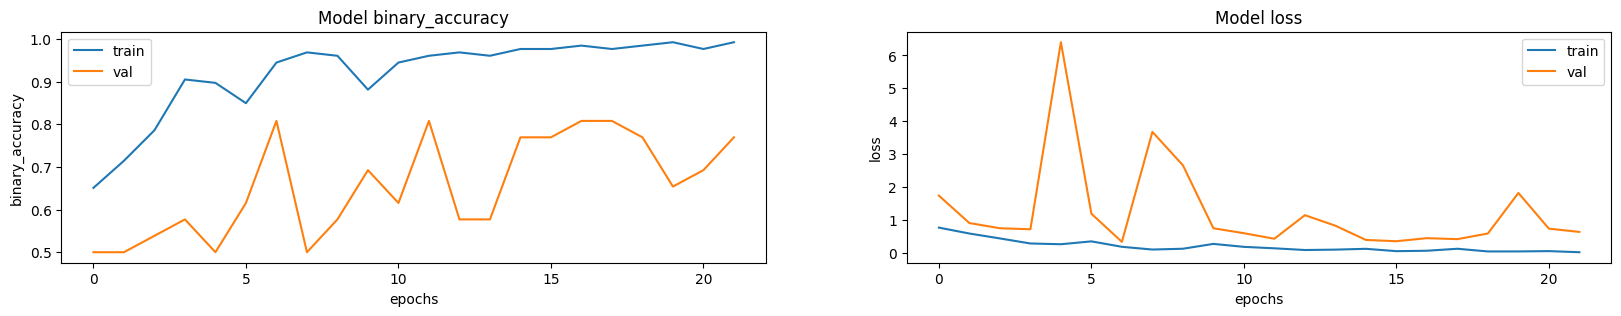

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 3))
ax = ax.ravel()

for i, metric in enumerate(["binary_accuracy", "loss"]):
    ax[i].plot(model.history.history[metric])
    ax[i].plot(model.history.history["val_" + metric])
    ax[i].set_title("Model {}".format(metric))
    ax[i].set_xlabel("epochs")
    ax[i].set_ylabel(metric)
    ax[i].legend(["train", "val"])

# Evaluation

5/5 [==============================] - 5s 717ms/step
Accuracy: 0.75
Precision: 0.7333333333333333
Sensitivity (Recall): 0.7857142857142857
Specificity: 0.7142857142857143
[[10  4]
 [ 3 11]]


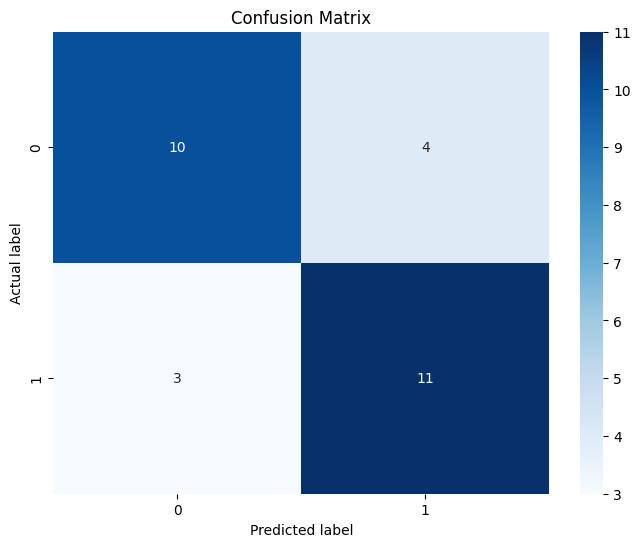

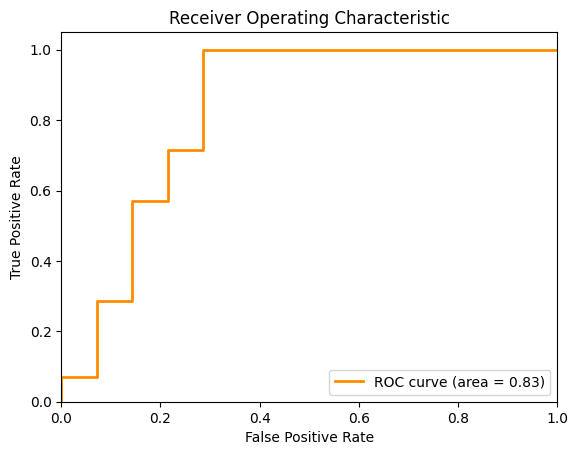

In [ ]:
test_model = keras.models.load_model("/content/drive/MyDrive/models/checkpoint_final_combined2.keras", custom_objects={'ResidualUnit': ResidualUnit})
# model.save('/content/drive/MyDrive/models/mri_resnet34_sgd_aug.keras')

test_predictions_prob = test_model.predict(test_ds)
test_predictions = (test_predictions_prob > 0.5).astype('int32')

test_labels = np.array([y for x, y in test_ds.unbatch()])

accuracy = accuracy_score(test_labels, test_predictions)
precision = precision_score(test_labels, test_predictions)
sensitivity = recall_score(test_labels, test_predictions)
specificity = recall_score(test_labels, test_predictions, pos_label=0)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Sensitivity (Recall): {sensitivity}")
print(f"Specificity: {specificity}")

cm = confusion_matrix(test_labels, test_predictions)
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

fpr, tpr, _ = roc_curve(test_labels, test_predictions_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
mri_model = keras.models.load_model("/content/drive/MyDrive/models/checkpoint_final_mri.keras", custom_objects={'ResidualUnit': ResidualUnit})

test_predictions_mri = mri_model.predict(test_ds)

test_labels = np.array([y for x, y in test_ds.unbatch()])

fpr_mri, tpr_mri, _ = roc_curve(test_labels, test_predictions_mri)
roc_auc_mri = auc(fpr_mri, tpr_mri)

roc_data_mri = {
    "fpr": fpr_mri,
    "tpr": tpr_mri,
    "roc_auc": roc_auc_mri
}

with open('/content/drive/MyDrive/roc_data_mri.pkl', 'wb') as f:
    pickle.dump(roc_data_mri, f)

In [ ]:
test_model_combined = keras.models.load_model("/content/drive/MyDrive/models/checkpoint_final_combined.keras", custom_objects={'ResidualUnit': ResidualUnit})

test_predictions_prob_combined = test_model_combined.predict(test_ds)

test_labels = np.array([y for x, y in test_ds.unbatch()])

fpr_combined, tpr_combined, _ = roc_curve(test_labels, test_predictions_prob_combined)
roc_auc_combined = auc(fpr_combined, tpr_combined)

roc_data_combined = {
    "fpr": fpr_combined,
    "tpr": tpr_combined,
    "roc_auc": roc_auc_combined
}

with open('/content/drive/MyDrive/roc_data_combined.pkl', 'wb') as f:
    pickle.dump(roc_data_combined, f)

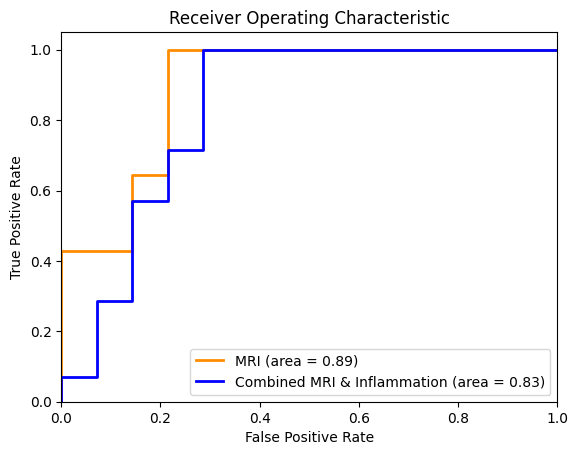

In [ ]:
with open('/content/drive/MyDrive/roc_data_mri.pkl', 'rb') as f:
    roc_data_mri = pickle.load(f)

with open('/content/drive/MyDrive/roc_data_combined.pkl', 'rb') as f:
    roc_data_combined = pickle.load(f)

plt.figure()

plt.plot(roc_data_mri['fpr'], roc_data_mri['tpr'], color='darkorange', lw=2, label=f'MRI (area = {roc_data_mri["roc_auc"]:.2f})')
plt.plot(roc_data_combined['fpr'], roc_data_combined['tpr'], color='blue', lw=2, label=f'Combined MRI & Inflammation (area = {roc_data_combined["roc_auc"]:.2f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
final_results_mri_only = {
    'accuracy': 0.786,
    'sensitivity': 0.857,
    'specificity': 0.714,
    'auc': 0.89
}

final_results_combined = {
    'accuracy': 0.75,
    'sensitivity': 0.786,
    'specificity': 0.714,
    'auc': 0.83
}

results_mri_only = [
    {'accuracy': 0.629, 'sensitivity': 0.714, 'specificity': 0.600, 'auc': 0.67},
    {'accuracy': 0.741, 'sensitivity': 0.700, 'specificity': 0.765, 'auc': 0.88},
    {'accuracy': 0.556, 'sensitivity': 0.438, 'specificity': 0.727, 'auc': 0.65},
    {'accuracy': 0.593, 'sensitivity': 0.857, 'specificity': 0.500, 'auc': 0.83}
]

results_combined = [
    {'accuracy': 0.519, 'sensitivity': 0.900, 'specificity': 0.294, 'auc': 0.64},
    {'accuracy': 0.667, 'sensitivity': 0.600, 'specificity': 0.706, 'auc': 0.85},
    {'accuracy': 0.667, 'sensitivity': 0.500, 'specificity': 0.765, 'auc': 0.78},
    {'accuracy': 0.407, 'sensitivity': 0.417, 'specificity': 0.400, 'auc': 0.47}
]

metrics = ['accuracy', 'sensitivity', 'specificity', 'auc']

mri_only_metrics = {metric: [result[metric] for result in results_mri_only] for metric in metrics}
combined_metrics = {metric: [result[metric] for result in results_combined] for metric in metrics}

results = {}

for metric in metrics:
    t_stat, p_val = stats.ttest_rel(mri_only_metrics[metric], combined_metrics[metric])
    results[metric] = {'t_stat': t_stat, 'p_val': p_val}

for metric, result in results.items():
    print(f"{metric.capitalize()}: t-statistic = {result['t_stat']:.3f}, p-value = {result['p_val']:.3f}")

    alpha = 0.05
    if result['p_val'] < alpha:
        print(f"The difference in {metric} between the two models is statistically significant (p < 0.05).")
    else:
        print(f"The difference in {metric} between the two models is not statistically significant (p > 0.05).")

Accuracy: t-statistic = 1.027, p-value = 0.380
The difference in accuracy between the two models is not statistically significant (p > 0.05).
Sensitivity: t-statistic = 0.538, p-value = 0.628
The difference in sensitivity between the two models is not statistically significant (p > 0.05).
Specificity: t-statistic = 1.474, p-value = 0.237
The difference in specificity between the two models is not statistically significant (p > 0.05).
Auc: t-statistic = 0.704, p-value = 0.532
The difference in auc between the two models is not statistically significant (p > 0.05).


In [ ]:
from google.colab import runtime
runtime.unassign()

In [ ]:
plot_dir = '/content/drive/My Drive/plots'
os.makedirs(plot_dir, exist_ok=True)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues, save_path=None):

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    if save_path:
        plt.savefig(save_path)
        print(f"Plot saved to {save_path}")
        plt.close()
    else:
        plt.show()

class_names = ['Not AD', 'AD']
save_plot_path = os.path.join(plot_dir, 'resnet18_mri_sgd')
plot_confusion_matrix(cm, classes=class_names, title='Confusion Matrix for MRI input with ResNet-18', save_path=save_plot_path)

Confusion matrix, without normalization
[[13  5]
 [ 7 11]]
Plot saved to /content/drive/My Drive/plots/resnet18_mri_sgd


In [ ]:
model_path = '/content/drive/My Drive/model'
os.makedirs(model_path, exist_ok=True)
model.save(os.path.join(model_path, '3d_classification_biomarkers.keras'))
print(f"Model saved to {model_path}")

Model saved to /content/drive/My Drive/model


# Plot images

In [ ]:
def plot_slices(volume, title=''):
    volume = np.squeeze(volume)

    slice_nums = (volume.shape[0] // 2, volume.shape[1] // 2, volume.shape[2] // 2)

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    axes[0].imshow(volume[slice_nums[0], :, :], cmap="gray")
    axes[0].set_title(f'Sagittal slice {slice_nums[0]}')

    axes[1].imshow(volume[:, slice_nums[1], :], cmap="gray")
    axes[1].set_title(f'Coronal slice {slice_nums[1]}')

    axes[2].imshow(volume[:, :, slice_nums[2]], cmap="gray")
    axes[2].set_title(f'Axial slice {slice_nums[2]}')

    fig.suptitle(title, y=0.0)

    plt.show()

# Viva Demo MRI-only

In [ ]:
mri_model = keras.models.load_model("/content/drive/MyDrive/models/checkpoint_final_mri.keras", custom_objects={'ResidualUnit': ResidualUnit})


In [ ]:
def load_dataset(dataset):
    images, labels = [], []
    for image, label in dataset.unbatch():
        images.append(image.numpy())
        labels.append(label.numpy())
    return np.array(images), np.array(labels)

test_images = np.load('/content/drive/MyDrive/processed_data/mri_images.npy', allow_pickle=True)
test_labels = np.load('/content/drive/MyDrive/processed_data/mri_labels.npy', allow_pickle=True)

In [ ]:
# test_images, test_labels = load_dataset(test_ds)

# np.save('/content/drive/MyDrive/processed_data/mri_images.npy', test_images)
# np.save('/content/drive/MyDrive/processed_data/mri_labels.npy', test_labels)

positive_samples = [(img, lbl) for img, lbl in zip(test_images, test_labels) if lbl == 1]
negative_samples = [(img, lbl) for img, lbl in zip(test_images, test_labels) if lbl == 0]

def get_random_sample(samples):
    random_sample = random.choice(samples)
    return random_sample[0], random_sample[1]

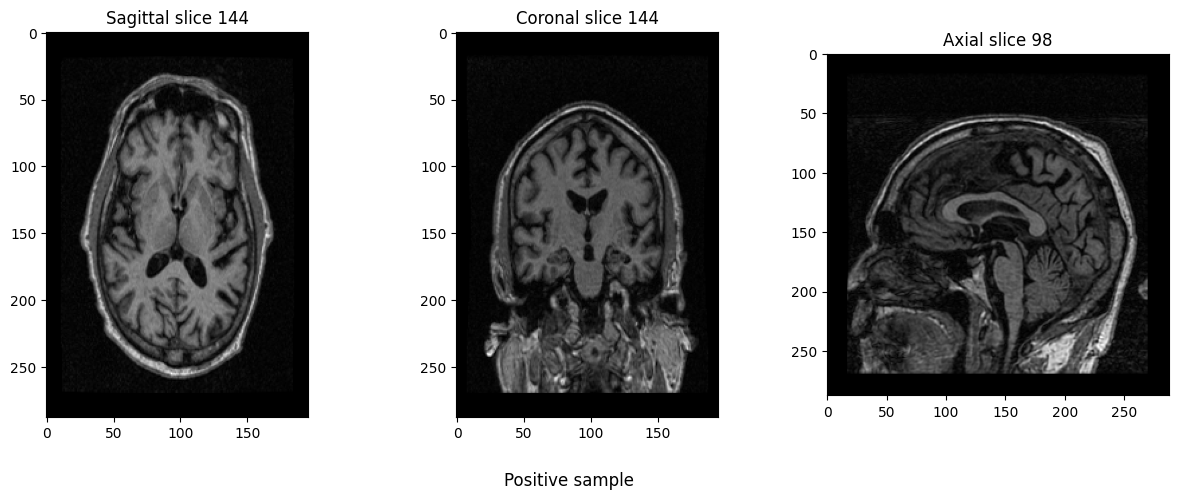

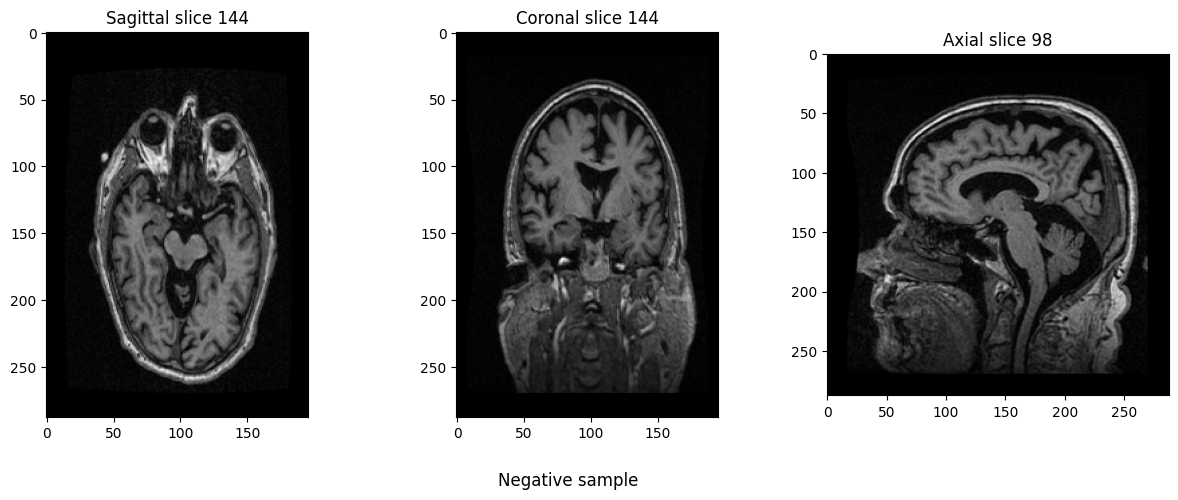

1/1 [==============================] - 0s 84ms/step
Probability of Alzheimer's for positive sample: 0.999866247177124
Probability of Alzheimer's for negative sample: 4.1173232602886856e-05


In [ ]:
positive_image, positive_label = get_random_sample(positive_samples)
negative_image, negative_label = get_random_sample(negative_samples)

# positive_image, positive_label = positive_samples[2]
# negative_image, negative_label = negative_samples[2]

positive_image = tf.expand_dims(positive_image, axis=0)
plot_slices(positive_image, title="Positive sample")

negative_image = tf.expand_dims(negative_image, axis=0)
plot_slices(negative_image, title="Negative sample")

positive_prob = mri_model.predict(positive_image)
negative_prob = mri_model.predict(negative_image)

print(f'Probability of Alzheimer\'s for positive sample: {positive_prob[0][0]}')
print(f'Probability of Alzheimer\'s for negative sample: {negative_prob[0][0]}')


# Viva Demo Combined

In [ ]:
combined_model = keras.models.load_model("/content/drive/MyDrive/models/checkpoint_final_combined2.keras", custom_objects={'ResidualUnit': ResidualUnit})


In [ ]:
def load_combined_dataset(dataset):
    image_data, bio_data, labels = [], [], []
    for (image_bio, label) in dataset.unbatch():
        image, bio = image_bio
        image_data.append(image.numpy())
        bio_data.append(bio.numpy())
        labels.append(label.numpy())
    return np.array(image_data), np.array(bio_data), np.array(labels)

combined_images = np.load('/content/drive/MyDrive/processed_data/mri_images.npy', allow_pickle=True)
test_bio_data = np.load('/content/drive/MyDrive/processed_data/combined_bio.npy', allow_pickle=True)
test_labels = np.load('/content/drive/MyDrive/processed_data/mri_labels.npy', allow_pickle=True)

In [ ]:
# test_images, test_bio_data, test_labels = load_combined_dataset(test_ds)

# np.save('/content/drive/MyDrive/processed_data/combined_images.npy', test_images)
# np.save('/content/drive/MyDrive/processed_data/combined_bio.npy', test_bio_data)
# np.save('/content/drive/MyDrive/processed_data/mri_labels.npy', test_labels)

positive_samples = [(img, bio, lbl) for img, bio, lbl in zip(combined_images, test_bio_data, test_labels) if lbl == 1]
negative_samples = [(img, bio, lbl) for img, bio, lbl in zip(combined_images, test_bio_data, test_labels) if lbl == 0]

def get_random_sample(samples):
    random_sample = random.choice(samples)
    return random_sample[0], random_sample[1], random_sample[2]

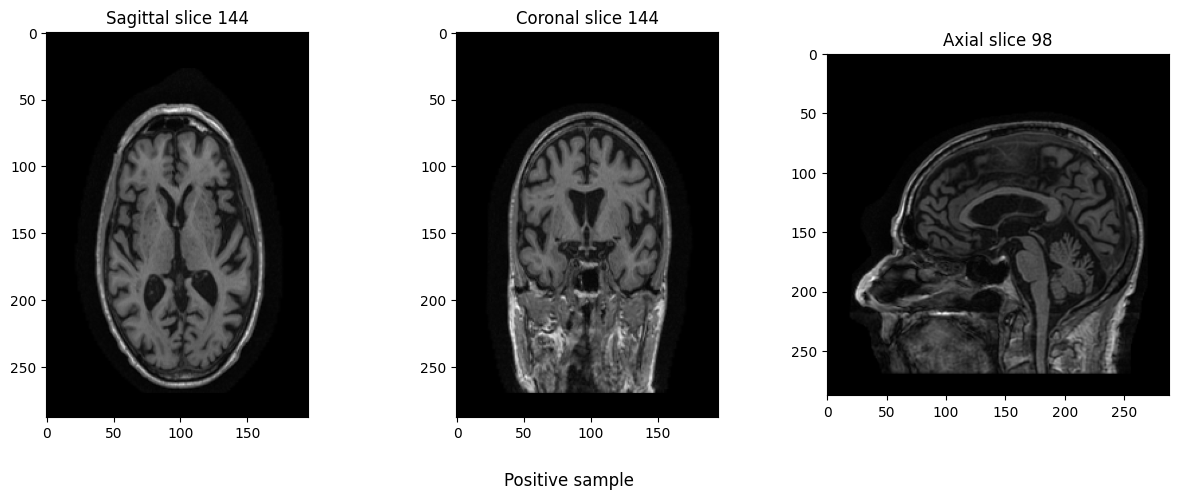

tf.Tensor([[0.18715149 0.03995372 0.22078852 0.35687533 0.1388889 ]], shape=(1, 5), dtype=float32)


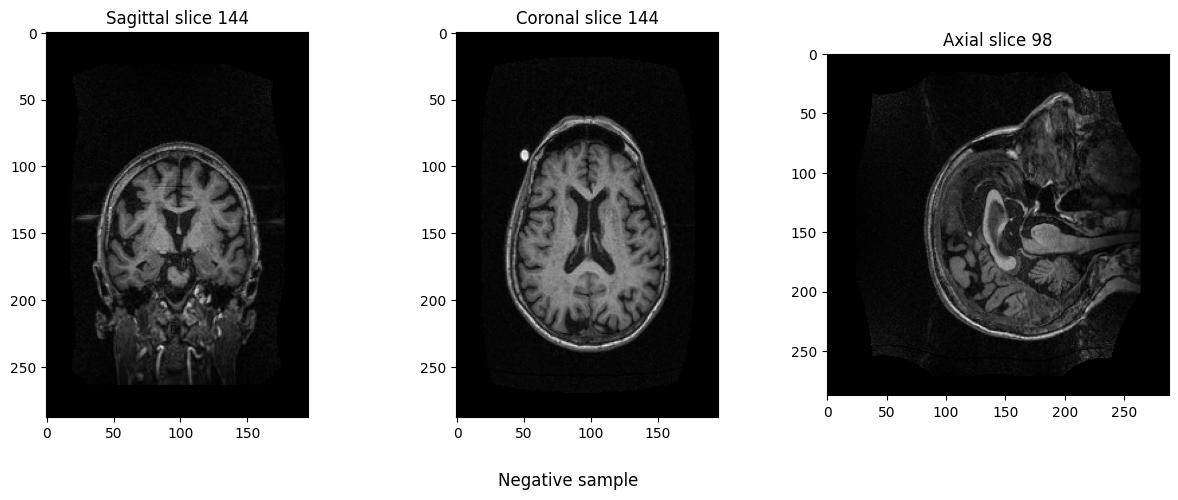

tf.Tensor([[0.27295274 0.0661896  0.2734767  0.04066345 0.02517361]], shape=(1, 5), dtype=float32)
1/1 [==============================] - 0s 84ms/step
Probability of Alzheimer's for positive sample: 0.9416819214820862
Probability of Alzheimer's for negative sample: 0.0243231151252985


In [ ]:
positive_image, positive_bio, positive_label = get_random_sample(positive_samples)
negative_image, negative_bio, negative_label = get_random_sample(negative_samples)

# positive_image, negative_bio, positive_label = positive_samples[2]
# negative_image, negative_bio, negative_label = negative_samples[2]


positive_image = tf.expand_dims(positive_image, axis=0)
plot_slices(positive_image, title="Positive sample")

positive_bio = tf.expand_dims(positive_bio, axis=0)
print(positive_bio)

negative_image = tf.expand_dims(negative_image, axis=0)
plot_slices(negative_image, title="Negative sample")

negative_bio = tf.expand_dims(negative_bio, axis=0)
print(negative_bio)

positive_prob = combined_model.predict([positive_image, positive_bio])
negative_prob = combined_model.predict([negative_image, negative_bio])

print(f'Probability of Alzheimer\'s for positive sample: {positive_prob[0][0]}')
print(f'Probability of Alzheimer\'s for negative sample: {negative_prob[0][0]}')
